# For Training Data

**Importing libraries**

In [104]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**Loading the csv files**

In [105]:
train_data=pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')

**Showing first 10 rows**

In [106]:
train_data.head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


**Showing the shape of the dataset**

In [107]:
train_data.shape

(20758, 18)

**Showing dataset information**

In [108]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

**Checking null values**

In [109]:
train_data.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

**Checking duplicates**

In [110]:
train_data.duplicated().sum()

0

**Showing extra statistical measures**

In [111]:
train_data.describe().T.style.background_gradient(cmap="Greens")

,count,mean,std,min,25%,50%,75%,max
id,20758.000000,10378.500000,5992.462780,0.000000,5189.250000,10378.500000,15567.750000,20757.000000
Age,20758.000000,23.841804,5.688072,14.000000,20.000000,22.815416,26.000000,61.000000
Height,20758.000000,1.700245,0.087312,1.450000,1.631856,1.700000,1.762887,1.975663
Weight,20758.000000,87.887768,26.379443,39.000000,66.000000,84.064875,111.600553,165.057269
FCVC,20758.000000,2.445908,0.533218,1.000000,2.000000,2.393837,3.000000,3.000000
NCP,20758.000000,2.761332,0.705375,1.000000,3.000000,3.000000,3.000000,4.000000
CH2O,20758.000000,2.029418,0.608467,1.000000,1.792022,2.000000,2.549617,3.000000
FAF,20758.000000,0.981747,0.838302,0.000000,0.008013,1.000000,1.587406,3.000000
TUE,20758.000000,0.616756,0.602113,0.000000,0.000000,0.573887,1.000000,2.000000


## Exploratory Data Analysis

#### Showing the Distributions

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>],
       [<Axes: title={'center': 'CH2O'}>,
        <Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>]],
      dtype=object)

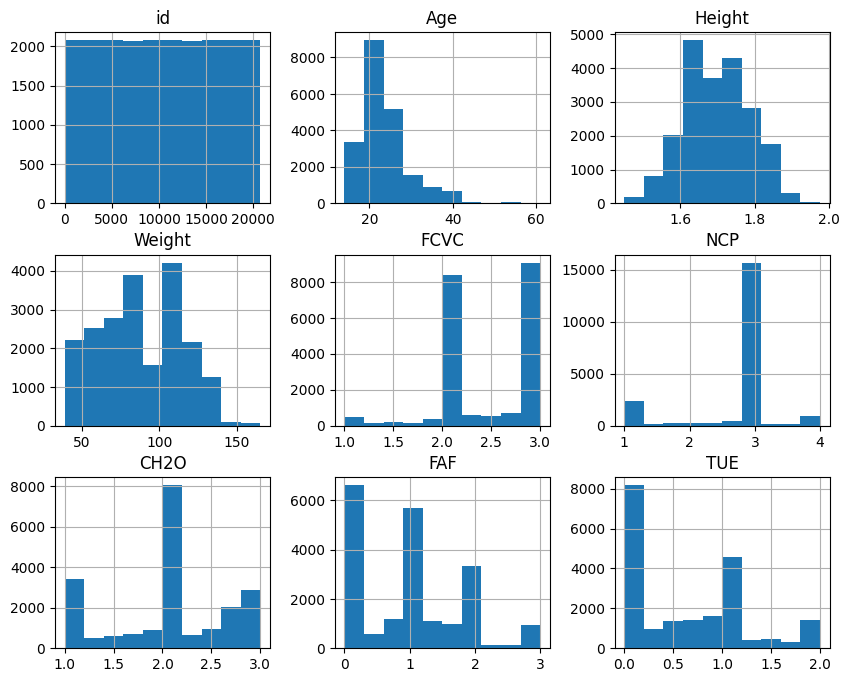

In [112]:
train_data.hist(figsize=(10,8))

- ### Target Variable Analysis

In [113]:
train_data['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

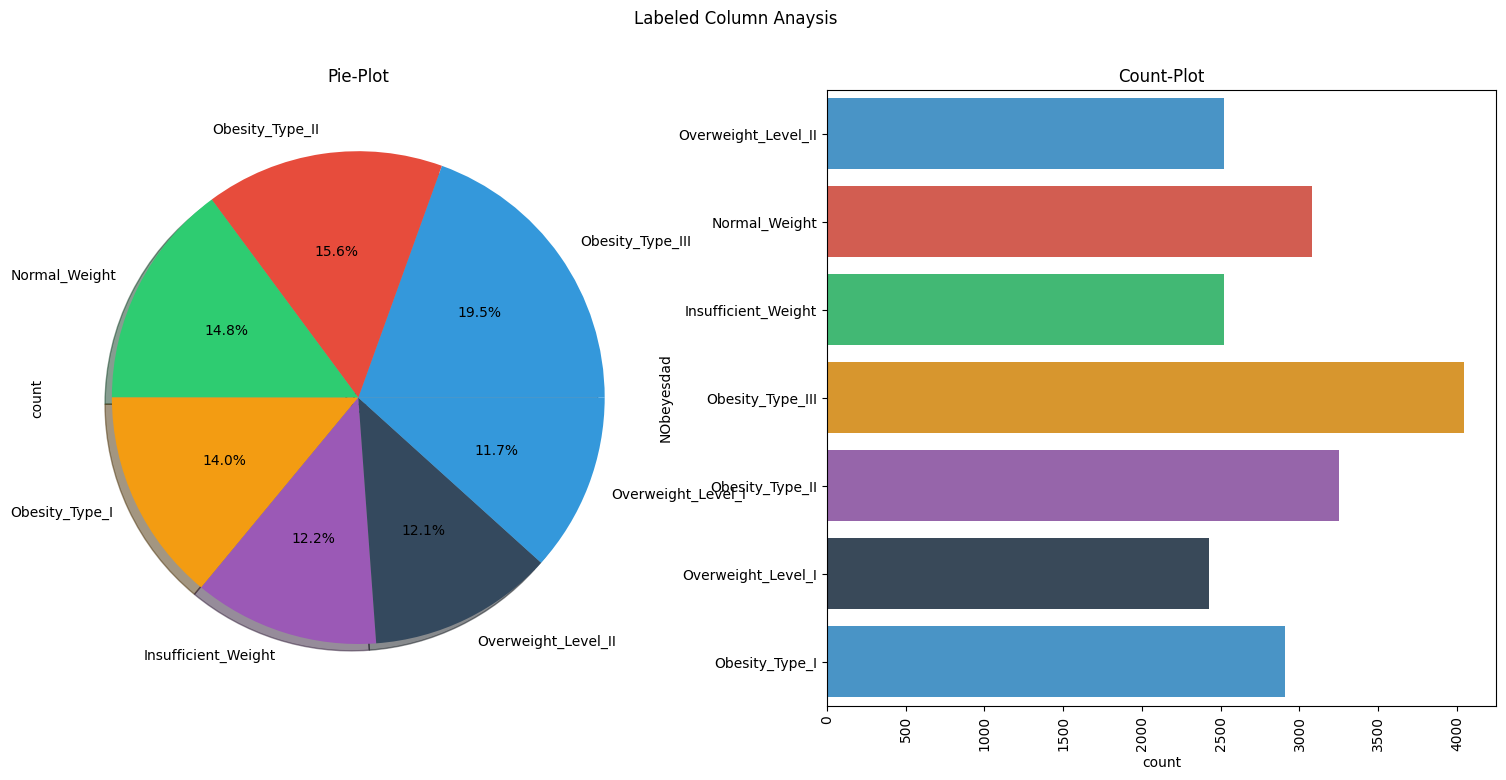

In [114]:
f,ax=plt.subplots(1,2, figsize=(19,8))
colors = ["#3498db", "#e74c3c", "#2ecc71", "#f39c12", "#9b59b6", "#34495e"]

train_data['NObeyesdad'].value_counts().plot.pie(autopct="%1.1f%%",ax=ax[0], shadow=True,colors=colors )
ax[0].set_title('Pie-Plot')


sn.countplot(y='NObeyesdad', data=train_data, ax=ax[1], palette=colors)
plt.xticks(rotation=90)
ax[1].set_title('Count-Plot')

plt.suptitle('Labeled Column Anaysis')
plt.show()

## 1. Catagorical Data Analysis

**Defining Categorical values**

In [115]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [116]:
categorical_vars=train_data[['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad']]

### a) Showing categorical fearures using piechart and countplot 

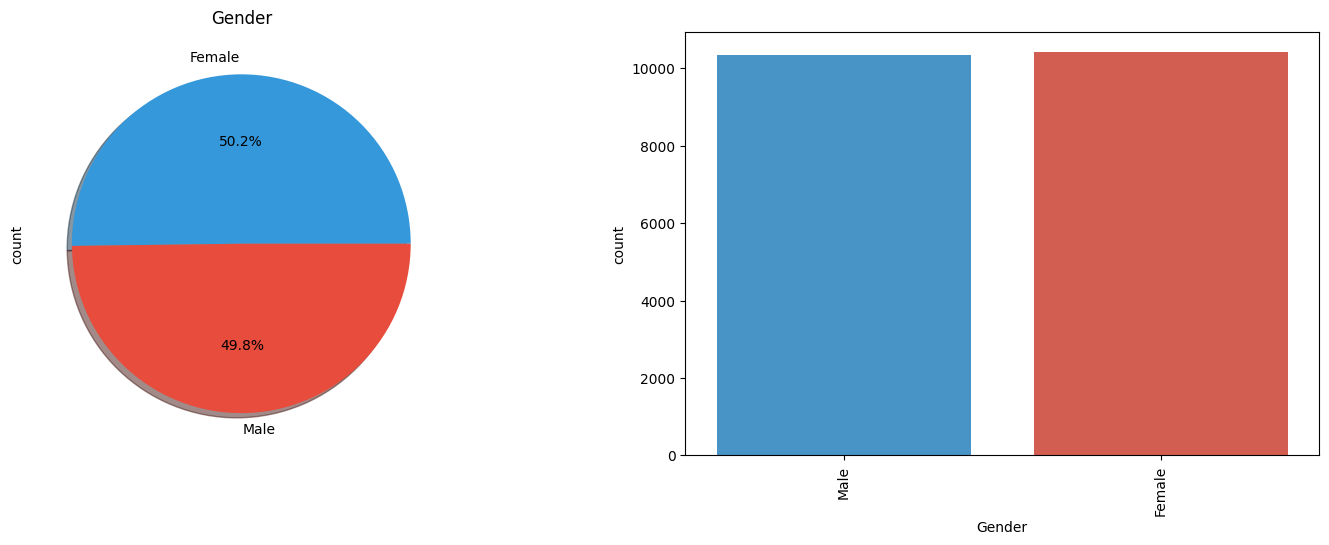

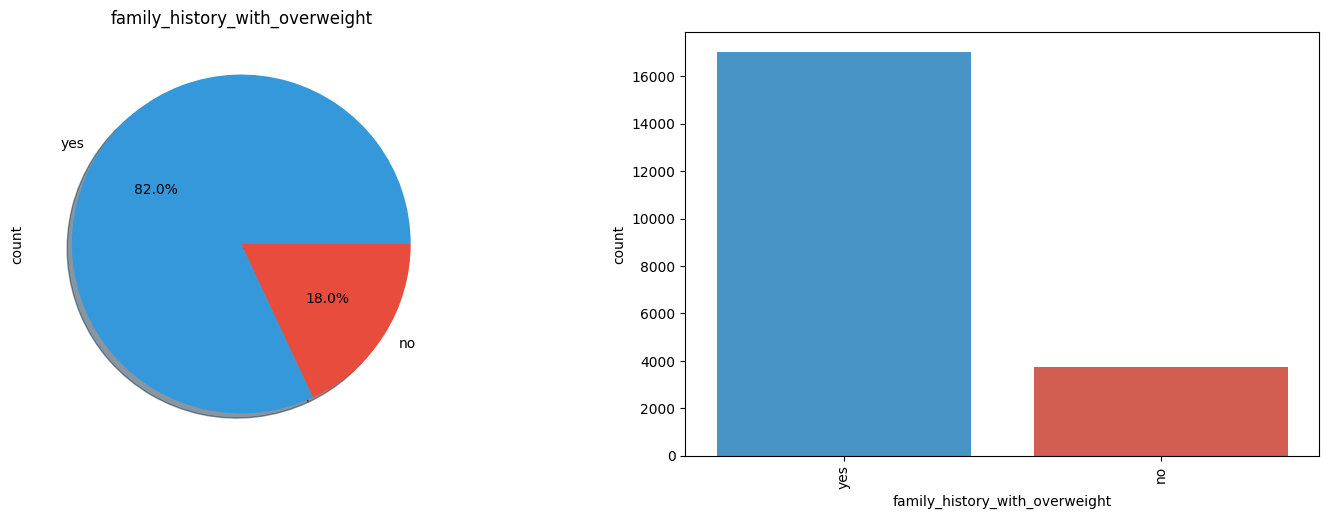

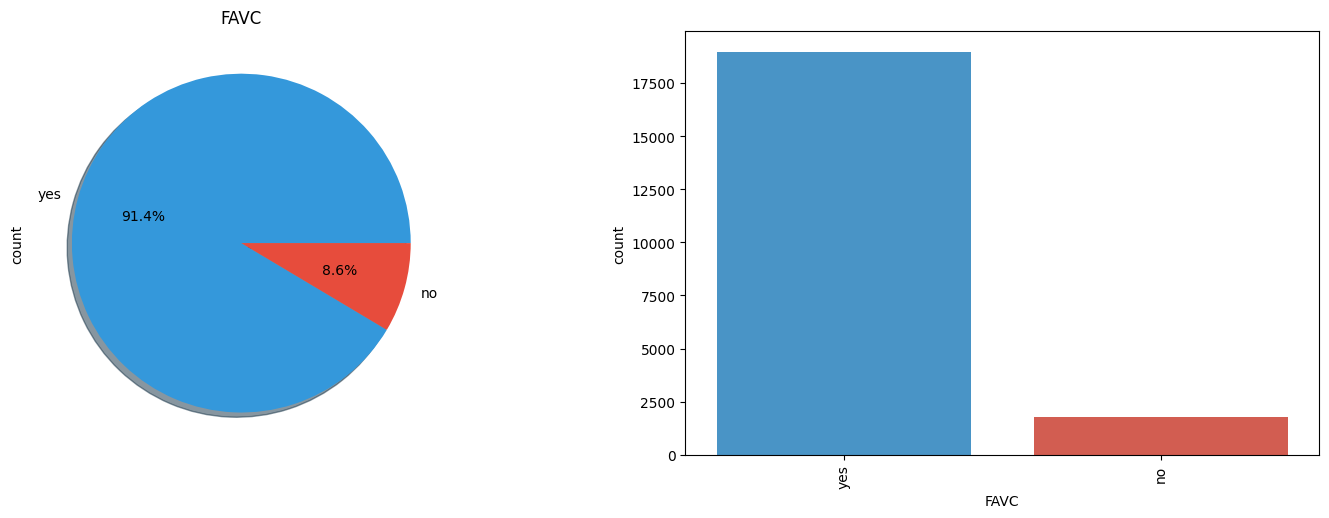

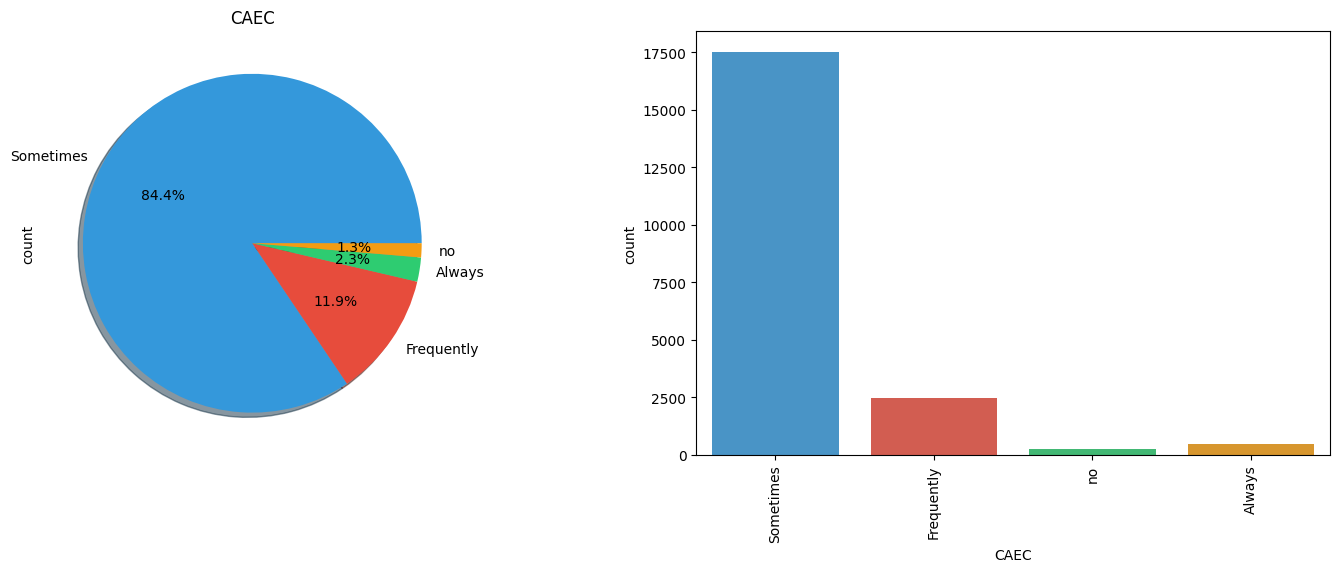

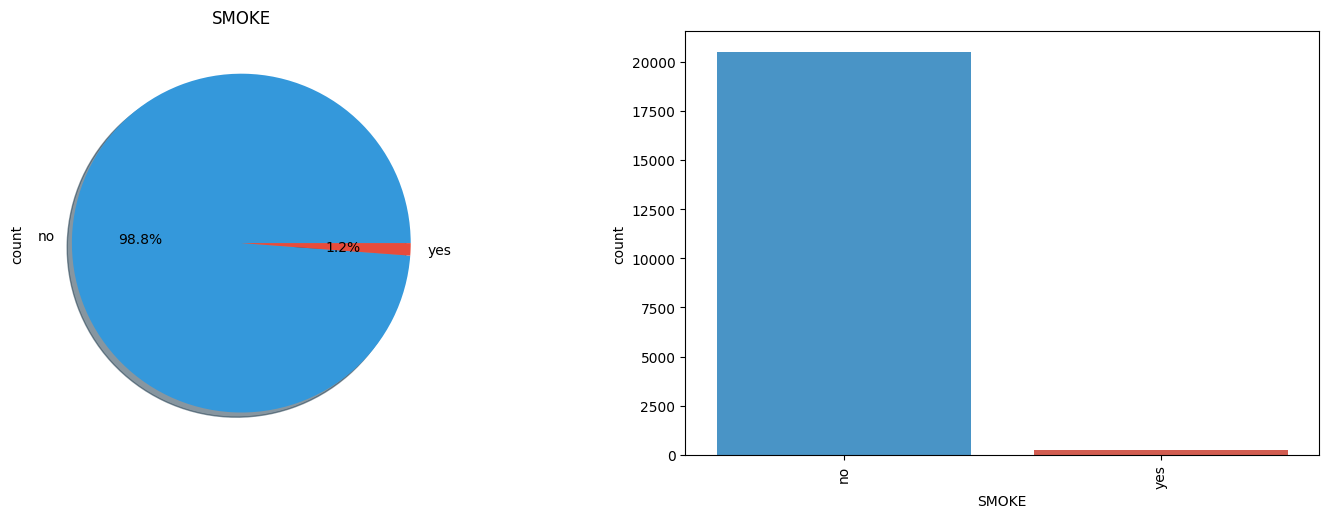

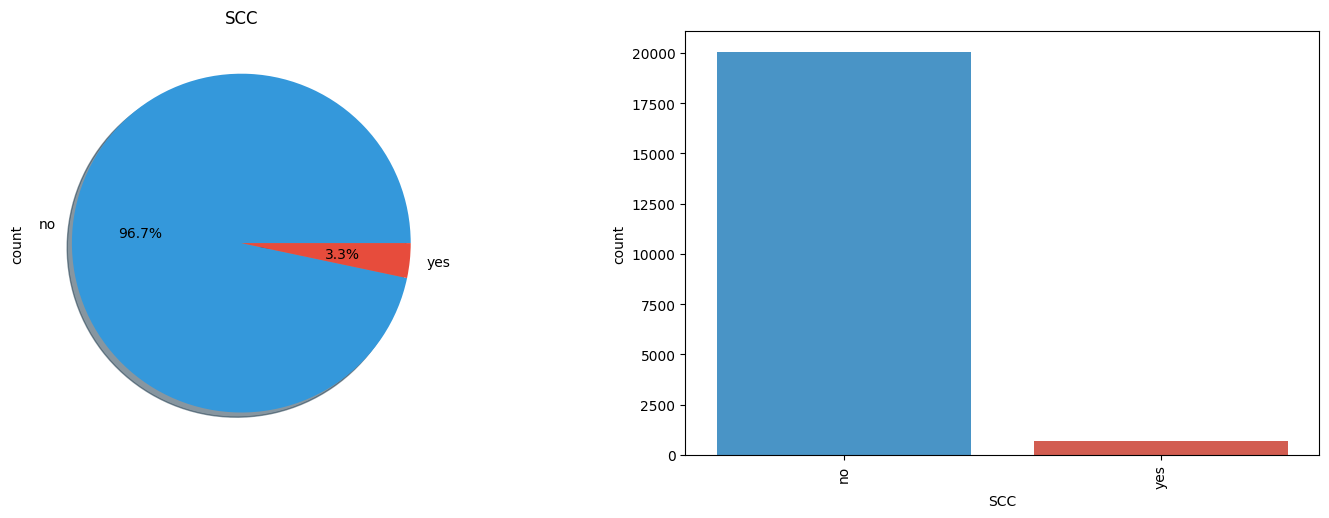

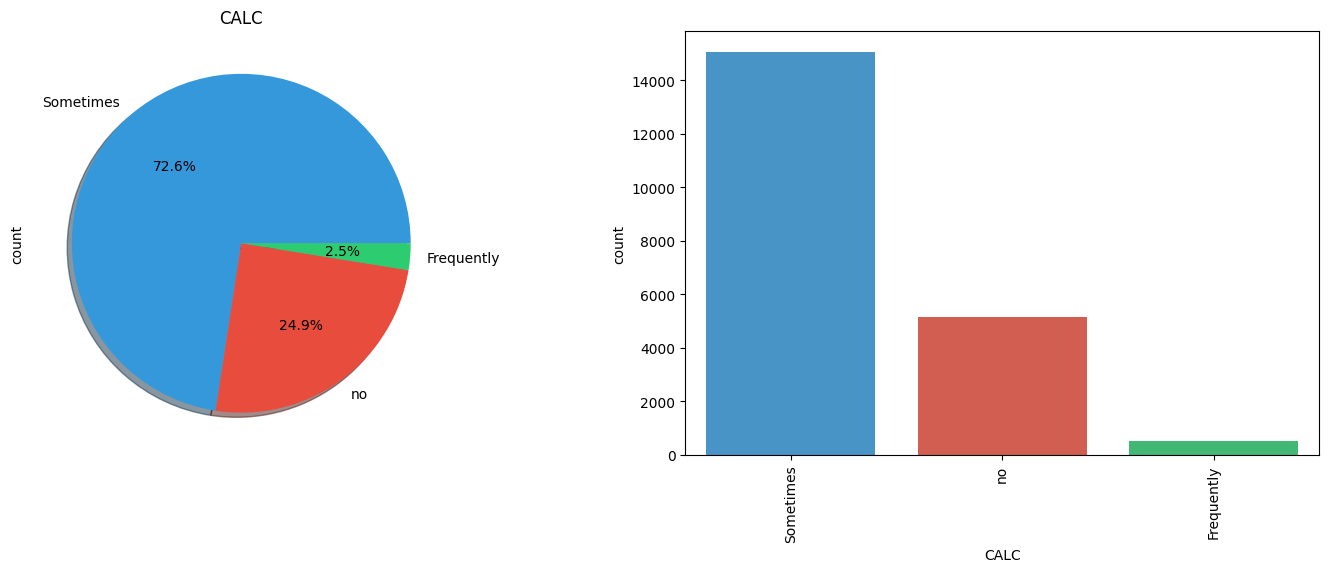

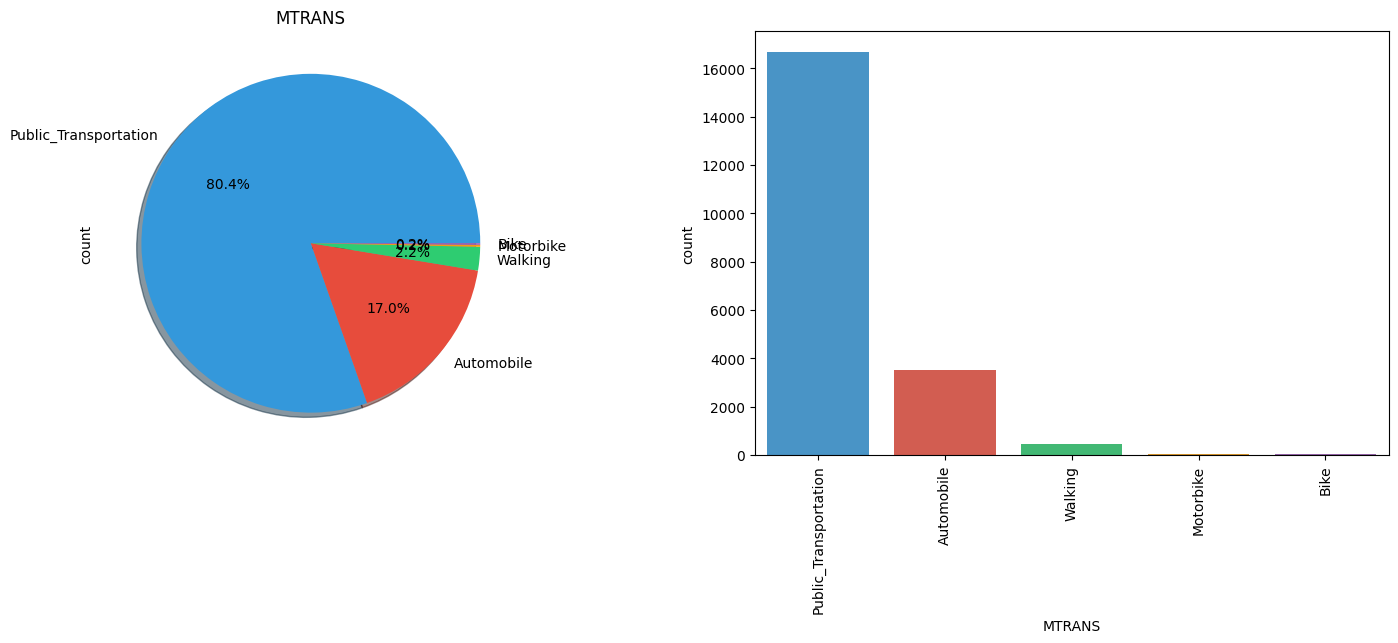

In [117]:
categorical_vars=categorical_vars.drop('NObeyesdad', axis=1)
# Define a color palette for the plots
colors = ["#3498db", "#e74c3c", "#2ecc71", "#f39c12", "#9b59b6", "#34495e"]

for col in categorical_vars:
    # Pie chart
    f, ax = plt.subplots(1, 2, figsize=(18, 5.5))

    train_data[col].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[0], shadow=True, colors=colors)
    ax[0].set_title(f'{col}')

    # Count plot
    sn.countplot(x=col, data=train_data, ax=ax[1], palette=colors)
    plt.xticks(rotation=90)

    plt.show()

## 2. Numerical value Analysis

**Defining numerical columns**

In [118]:
numeric=train_data[['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']]

### b) Showing the distributions

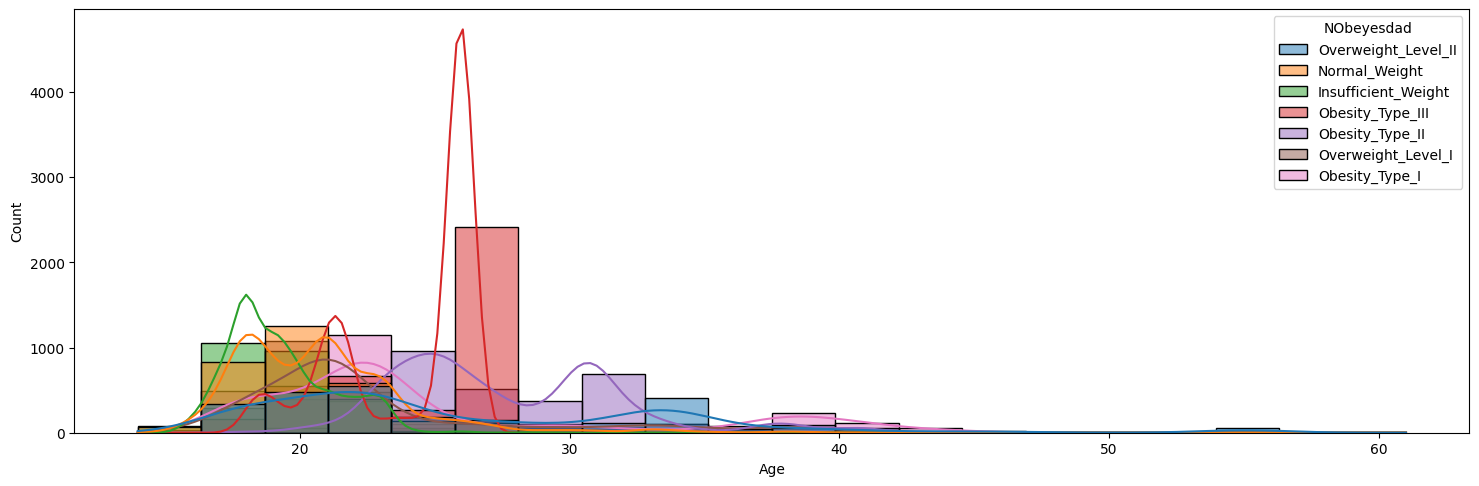

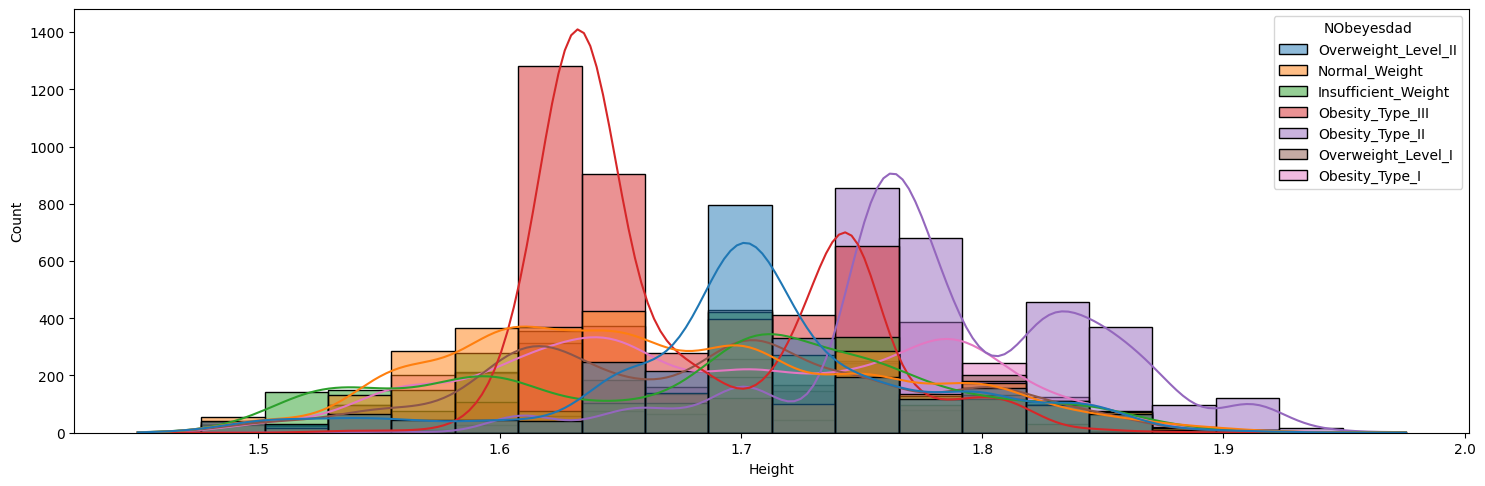

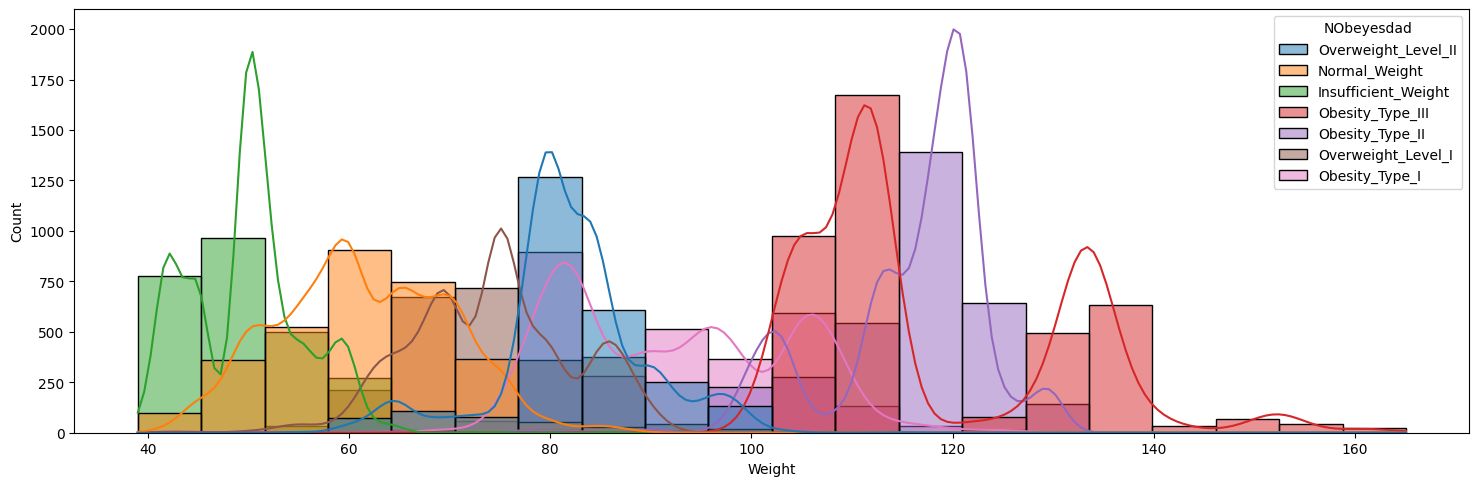

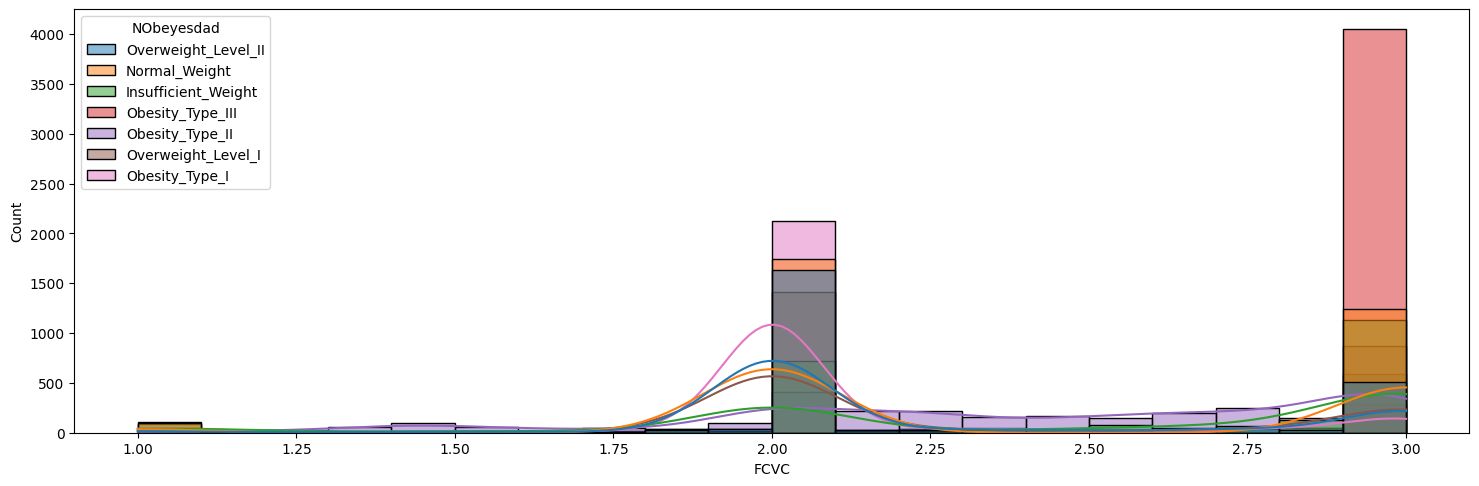

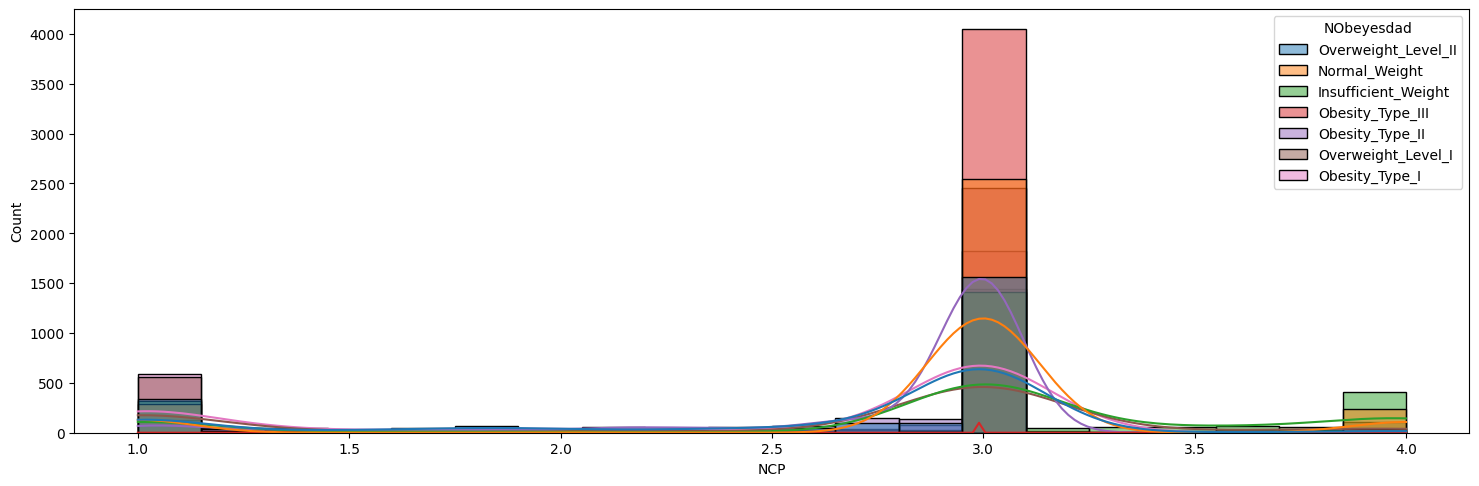

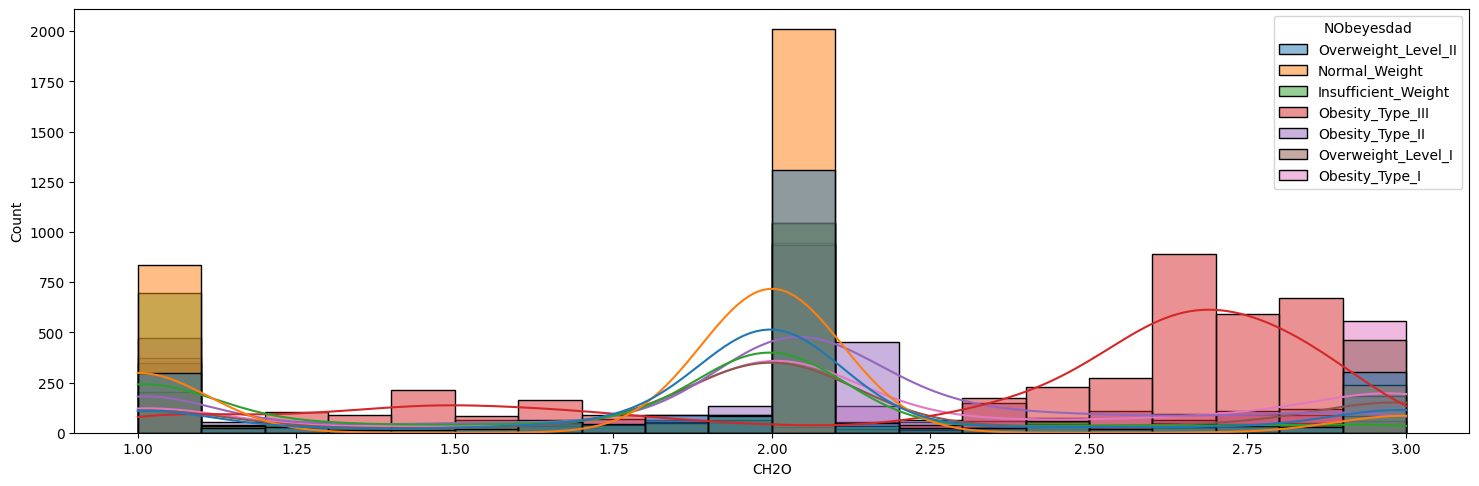

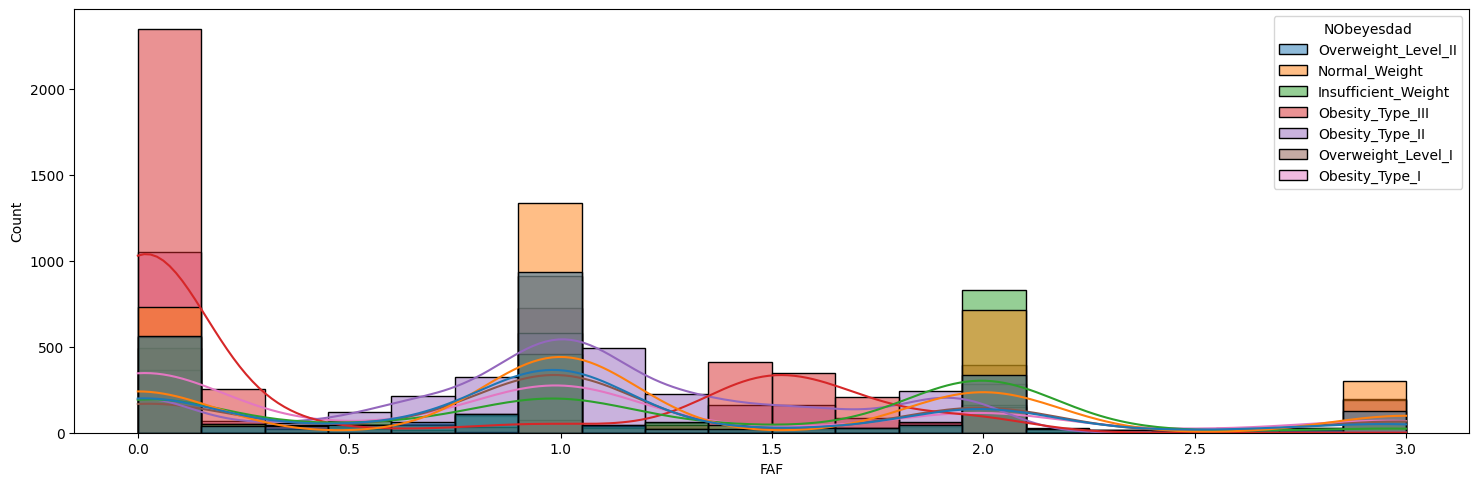

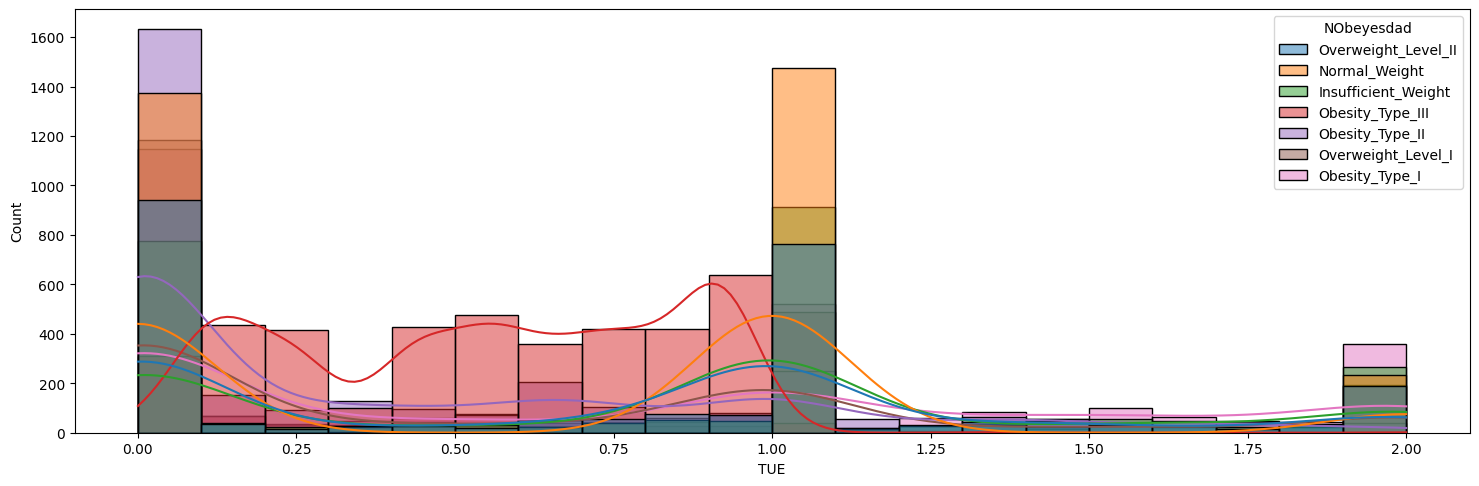

In [119]:
for num in numeric:
    f,ax=plt.subplots(figsize=(18,5.5))
    sn.histplot(data=train_data, x=num,hue="NObeyesdad", bins=20, kde=True)

### c) Showing the Co-relations

<Axes: >

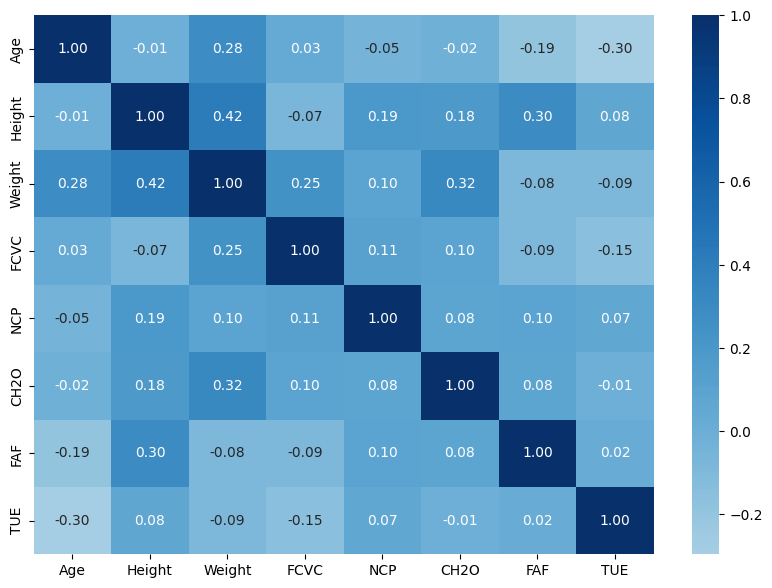

In [120]:
plt.figure(figsize=(10, 7))
sn.heatmap(numeric.corr(), annot=True, cmap='Blues', fmt='.2f', center=0)

### d) Visualizing the outliers

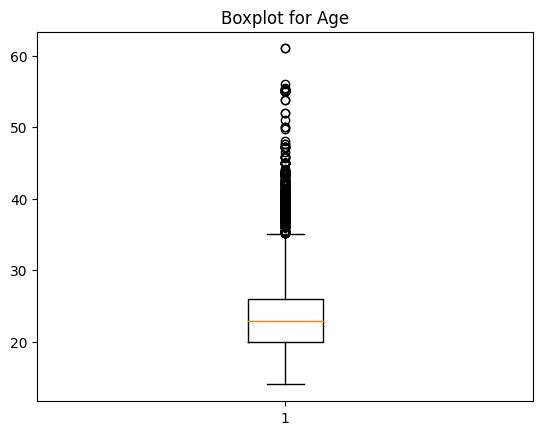

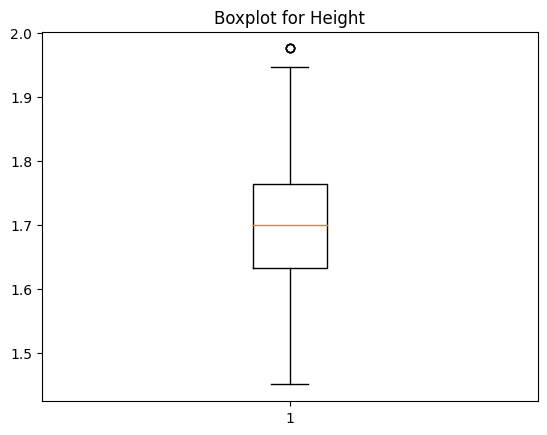

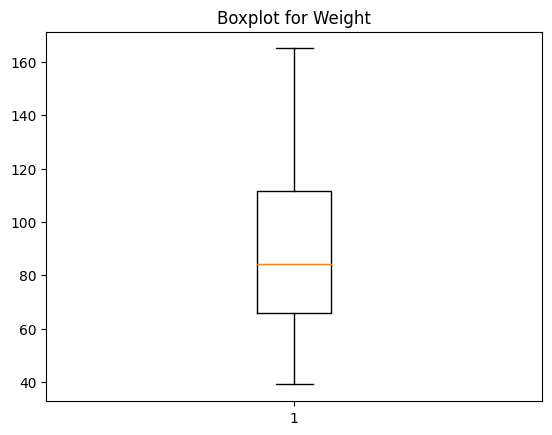

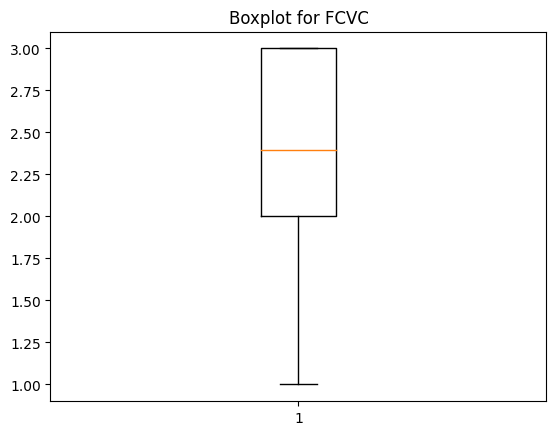

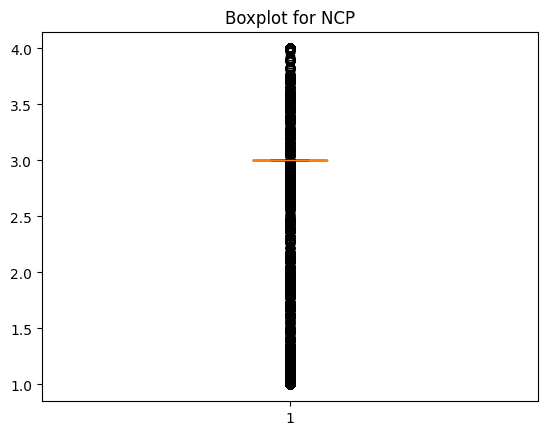

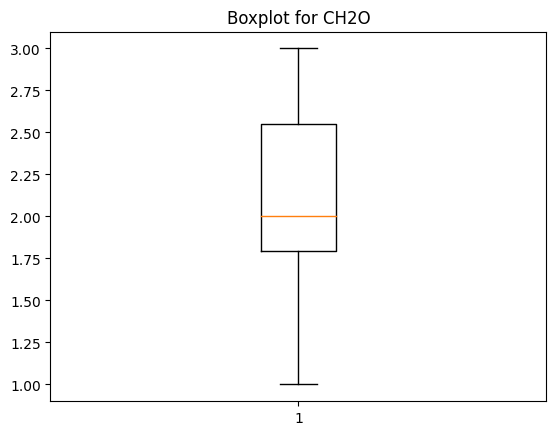

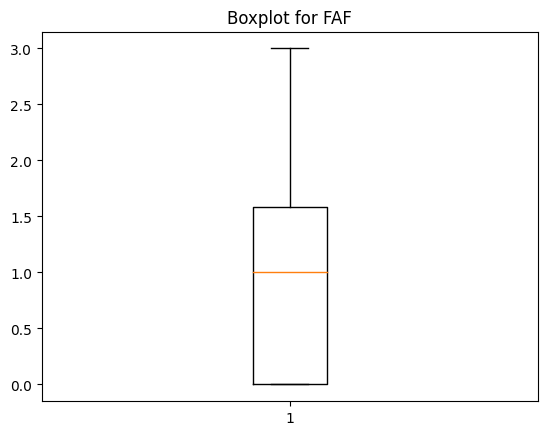

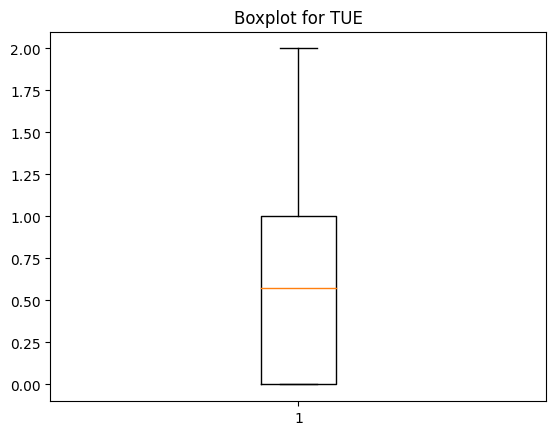

In [121]:
for col in numeric:
    plt.boxplot(numeric[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

-------------------------------------------------------------------------------------------------

## Data Pre-processing

- #### Label Encoding

In [122]:
lb=LabelEncoder()

for col in categorical_vars:
    train_data[col]=lb.fit_transform(train_data[col])

In [123]:
train_data['NObeyesdad']=lb.fit_transform(train_data['NObeyesdad'])

In [124]:
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,6
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,1
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3,4
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3,6


- #### Now for Labled Column

In [125]:
train_data['NObeyesdad'].value_counts()

NObeyesdad
4    4046
3    3248
1    3082
2    2910
0    2523
6    2522
5    2427
Name: count, dtype: int64

## Train Test Split

In [126]:
X=train_data.drop(columns=['id','NObeyesdad'], axis=1)
Y=train_data['NObeyesdad']

In [127]:
print(X)

       Gender        Age    Height      Weight  \
0           1  24.443011  1.699998   81.669950   
1           0  18.000000  1.560000   57.000000   
2           0  18.000000  1.711460   50.165754   
3           0  20.952737  1.710730  131.274851   
4           1  31.641081  1.914186   93.798055   
...       ...        ...       ...         ...   
20753       1  25.137087  1.766626  114.187096   
20754       1  18.000000  1.710000   50.000000   
20755       1  20.101026  1.819557  105.580491   
20756       1  33.852953  1.700000   83.520113   
20757       1  26.680376  1.816547  118.134898   

       family_history_with_overweight  FAVC      FCVC       NCP  CAEC  SMOKE  \
0                                   1     1  2.000000  2.983297     2      0   
1                                   1     1  2.000000  3.000000     1      0   
2                                   1     1  1.880534  1.411685     2      0   
3                                   1     1  3.000000  3.000000     2      0   

In [128]:
print(Y)

0        6
1        1
2        0
3        4
4        6
        ..
20753    3
20754    0
20755    3
20756    6
20757    3
Name: NObeyesdad, Length: 20758, dtype: int64


In [129]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=2)

In [130]:
print(X.shape, X_train.shape,X_test.shape)

(20758, 16) (16606, 16) (4152, 16)


## Scaling the data

In [131]:
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [132]:
X_train

array([[-0.99279962,  0.38008462, -0.57333889, ..., -0.6313404 ,
        -0.47305159,  0.42843883],
       [-0.99279962,  2.96278483, -1.50874294, ..., -1.0259916 ,
        -0.47305159, -2.18820521],
       [ 1.0072526 ,  1.17965068,  0.30550431, ..., -1.0259916 ,
        -0.47305159,  0.42843883],
       ...,
       [ 1.0072526 , -0.14689771,  1.71839073, ...,  0.6370491 ,
         1.63524008, -2.18820521],
       [ 1.0072526 ,  0.17375224,  1.43689353, ..., -0.89102587,
        -0.47305159,  0.42843883],
       [ 1.0072526 , -0.49529188,  1.99952103, ...,  1.32810238,
        -0.47305159,  0.42843883]])

## Model Training

#### i) Logistic Regression

In [133]:
lg=LogisticRegression()
lg.fit(X_train,Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Accuracy Score and Confusion Matrix**

Training Accuracy is:  0.8617969408647477
Testing Accuracy is:  0.8571772639691715
 
Confusion Matrix


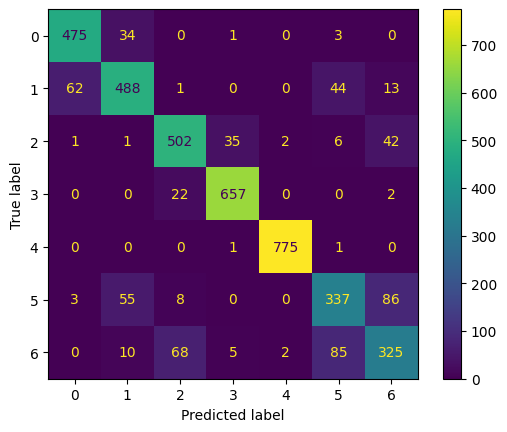

In [134]:
print('Training Accuracy is: ',lg.score(X_train,Y_train))
print('Testing Accuracy is: ',lg.score(X_test,Y_test))

print(" ")

print('Confusion Matrix')
y_pred=lg.predict(X_test)
conf=confusion_matrix(Y_test, y_pred)
display=ConfusionMatrixDisplay(confusion_matrix=conf)
display.plot()

**Classification Report**

In [135]:
print("Classification Report")
clas=classification_report(Y_test, y_pred)
print(clas)

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       513
           1       0.83      0.80      0.82       608
           2       0.84      0.85      0.84       589
           3       0.94      0.96      0.95       681
           4       0.99      1.00      1.00       777
           5       0.71      0.69      0.70       489
           6       0.69      0.66      0.67       495

    accuracy                           0.86      4152
   macro avg       0.84      0.84      0.84      4152
weighted avg       0.86      0.86      0.86      4152



#### ii) LGBM

In [136]:
lgm=LGBMClassifier()
lgm.fit(X_train,Y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2030
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 16
[LightGBM] [Info] Start training from score -2.111629
[LightGBM] [Info] Start training from score -1.903928
[LightGBM] [Info] Start training from score -1.967766
[LightGBM] [Info] Start training from score -1.867026
[LightGBM] [Info] Start training from score -1.625280
[LightGBM] [Info] Start training from score -2.148108
[LightGBM] [Info] Start training from score -2.103207


LGBMClassifier()

**Accuracy Score and Confusion Matrix**

Training Accuracy is:  0.9818138022401541
Testing Accuracy is:  0.9046242774566474
 
Confusion Matrix


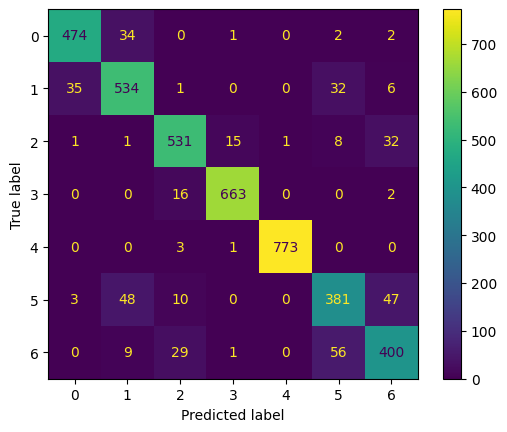

In [137]:
print('Training Accuracy is: ',lgm.score(X_train,Y_train))
print('Testing Accuracy is: ',lgm.score(X_test,Y_test))

print(" ")

print('Confusion Matrix')
y1_pred=lgm.predict(X_test)
conf=confusion_matrix(Y_test, y1_pred)
display=ConfusionMatrixDisplay(confusion_matrix=conf)
display.plot()

**Classification Report**

In [138]:
print("Classification Report")
clas=classification_report(Y_test, y1_pred)
print(clas)

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       513
           1       0.85      0.88      0.87       608
           2       0.90      0.90      0.90       589
           3       0.97      0.97      0.97       681
           4       1.00      0.99      1.00       777
           5       0.80      0.78      0.79       489
           6       0.82      0.81      0.81       495

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



#### iii) XGBoost

In [139]:
xg=XGBClassifier()
xg.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

**Accuracy Score and Confusion Matrix**

Training Accuracy is:  0.9860291460917741
Testing Accuracy is:  0.905587668593449
 
Confusion Matrix


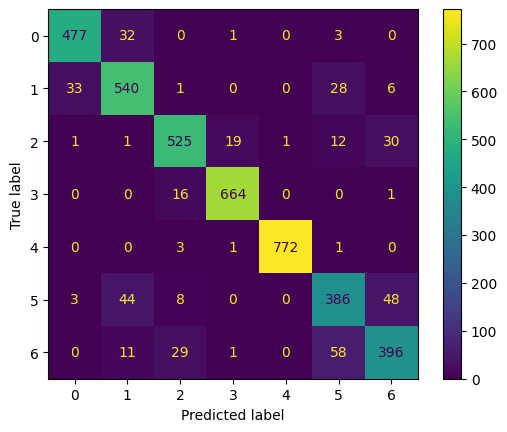

In [140]:
print('Training Accuracy is: ',xg.score(X_train,Y_train))
print('Testing Accuracy is: ',xg.score(X_test,Y_test))

print(" ")

print('Confusion Matrix')
y2_pred=xg.predict(X_test)
conf=confusion_matrix(Y_test, y2_pred)
display=ConfusionMatrixDisplay(confusion_matrix=conf)
display.plot()

**Classification Report**

In [141]:
print("Classification Report")
clas=classification_report(Y_test, y2_pred)
print(clas)

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       513
           1       0.86      0.89      0.87       608
           2       0.90      0.89      0.90       589
           3       0.97      0.98      0.97       681
           4       1.00      0.99      1.00       777
           5       0.79      0.79      0.79       489
           6       0.82      0.80      0.81       495

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152



#### iv) RandomForest

In [142]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

**Accuracy Score and Confusion Matrix**

Training Accuracy is:  1.0
Testing Accuracy is:  0.9000481695568401
 
Confusion Matrix


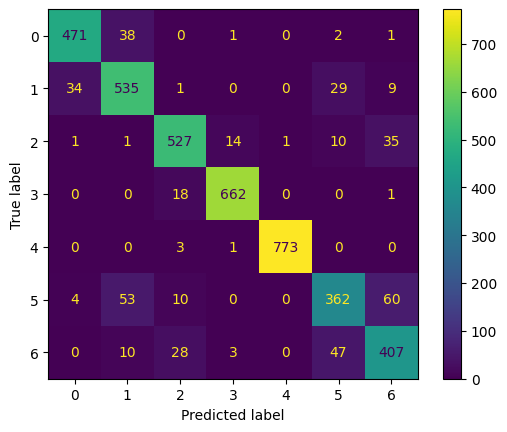

In [143]:
print('Training Accuracy is: ',rf.score(X_train,Y_train))
print('Testing Accuracy is: ',rf.score(X_test,Y_test))

print(" ")

print('Confusion Matrix')
y3_pred=rf.predict(X_test)
conf=confusion_matrix(Y_test, y3_pred)
display=ConfusionMatrixDisplay(confusion_matrix=conf)
display.plot()

**Classification Report**

In [144]:
print("Classification Report")
clas=classification_report(Y_test, y3_pred)
print(clas)

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       513
           1       0.84      0.88      0.86       608
           2       0.90      0.89      0.90       589
           3       0.97      0.97      0.97       681
           4       1.00      0.99      1.00       777
           5       0.80      0.74      0.77       489
           6       0.79      0.82      0.81       495

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



#### v) Decision Tree 

In [145]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

**Accuracy Score and Confusion Matrix**

Training Accuracy is:  1.0
Testing Accuracy is:  0.8338150289017341
 
Confusion Matrix


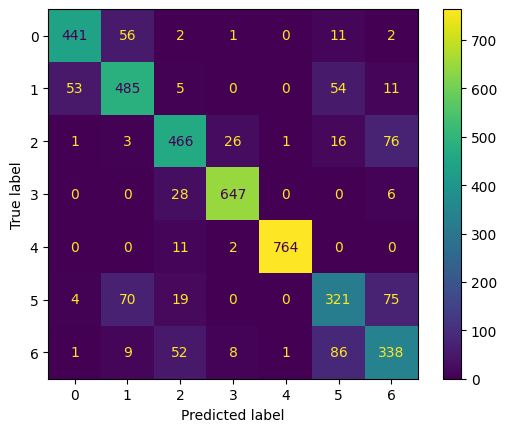

In [146]:
print('Training Accuracy is: ',dt.score(X_train,Y_train))
print('Testing Accuracy is: ',dt.score(X_test,Y_test))

print(" ")

print('Confusion Matrix')
y4_pred=dt.predict(X_test)
conf=confusion_matrix(Y_test, y4_pred)
display=ConfusionMatrixDisplay(confusion_matrix=conf)
display.plot()

**Classification Report**

In [147]:
print("Classification Report")
clas=classification_report(Y_test, y4_pred)
print(clas)

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       513
           1       0.78      0.80      0.79       608
           2       0.80      0.79      0.80       589
           3       0.95      0.95      0.95       681
           4       1.00      0.98      0.99       777
           5       0.66      0.66      0.66       489
           6       0.67      0.68      0.67       495

    accuracy                           0.83      4152
   macro avg       0.82      0.82      0.82      4152
weighted avg       0.83      0.83      0.83      4152



#### Above from this we are considering our model as LGBMClassifier

------------------------------------------------------------------------------------------------------

# For Testing Data

**loading the dataset**

In [148]:
test_data=pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

**Showing the first 10 rows**

In [149]:
test_data.head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
5,20763,Male,19.799054,1.844751,59.605028,yes,yes,2.000000,4.000000,Sometimes,no,2.722063,no,2.000000,1.283673,no,Automobile
6,20764,Male,18.000000,1.728834,51.442293,yes,yes,1.202075,3.000000,Sometimes,no,1.087166,no,0.788585,1.000000,Sometimes,Public_Transportation
7,20765,Male,20.000000,1.810000,80.000000,yes,yes,2.000000,3.000000,Always,no,2.000000,no,3.000000,0.000000,no,Automobile
8,20766,Male,21.000000,1.700000,80.000000,yes,yes,2.000000,3.000000,Frequently,yes,2.000000,no,0.000000,2.000000,no,Public_Transportation
9,20767,Female,21.000000,1.560000,53.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.000000,1.000000,Sometimes,Public_Transportation


**Showing dataset information**

In [150]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

**Checking null values**

In [151]:
test_data.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

**Checking duplicates**

In [152]:
test_data.duplicated().sum()

0

**Showing extra statistical measures**

In [153]:
test_data.describe().T.style.background_gradient(cmap="Blues")

,count,mean,std,min,25%,50%,75%,max
id,13840.000000,27677.500000,3995.408198,20758.000000,24217.750000,27677.500000,31137.250000,34597.000000
Age,13840.000000,23.952740,5.799814,14.000000,20.000000,22.906342,26.000000,61.000000
Height,13840.000000,1.698934,0.088761,1.450000,1.631662,1.700000,1.760710,1.980000
Weight,13840.000000,87.384504,26.111819,39.000000,65.000000,83.952968,111.157811,165.057269
FCVC,13840.000000,2.442898,0.531606,1.000000,2.000000,2.358087,3.000000,3.000000
NCP,13840.000000,2.750610,0.710927,1.000000,3.000000,3.000000,3.000000,4.000000
CH2O,13840.000000,2.032044,0.611230,1.000000,1.771781,2.000000,2.552388,3.000000
FAF,13840.000000,0.974532,0.840361,0.000000,0.001086,1.000000,1.571865,3.000000
TUE,13840.000000,0.611033,0.608005,0.000000,0.000000,0.552498,1.000000,2.000000


### EDA 

### Histogram

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>],
       [<Axes: title={'center': 'CH2O'}>,
        <Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>]],
      dtype=object)

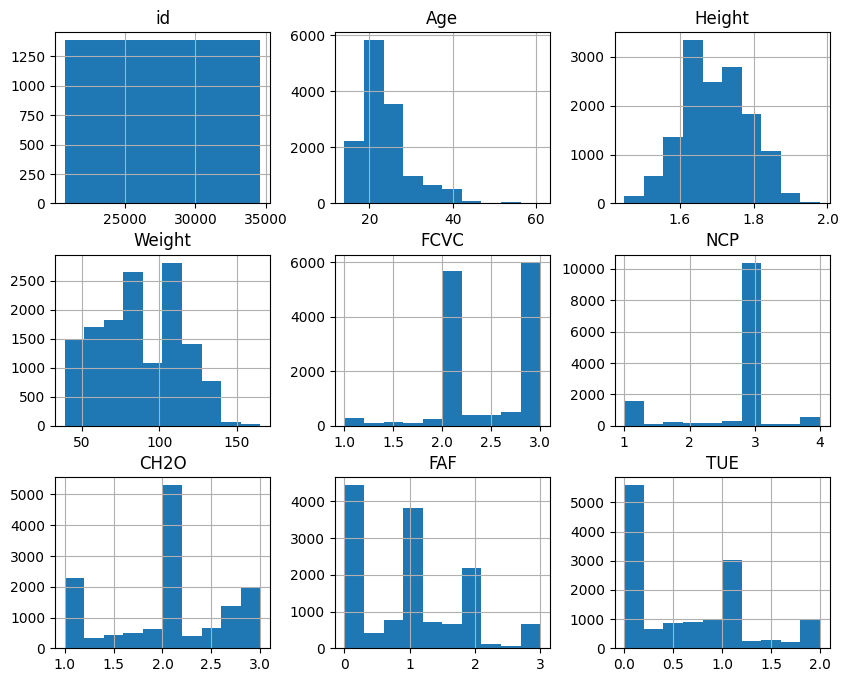

In [154]:
test_data.hist(figsize=(10,8))

## 1. Categorical columns

**Defining categorical columns**

In [155]:
categorical_vars=train_data[['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']]

### Showing the features using pie-chart and countplot

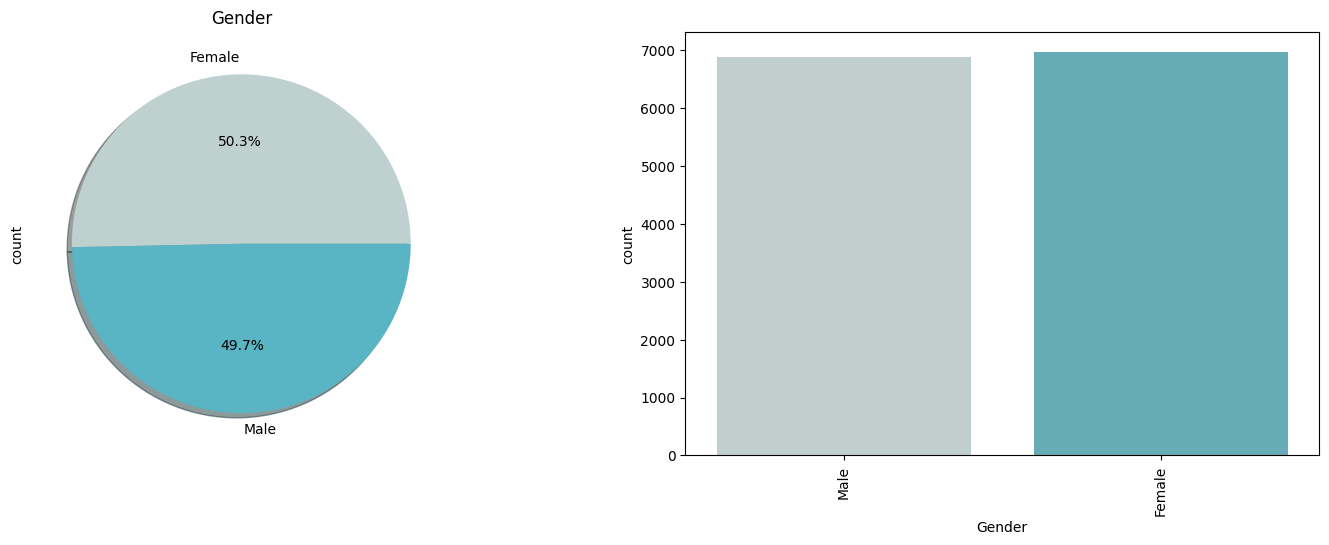

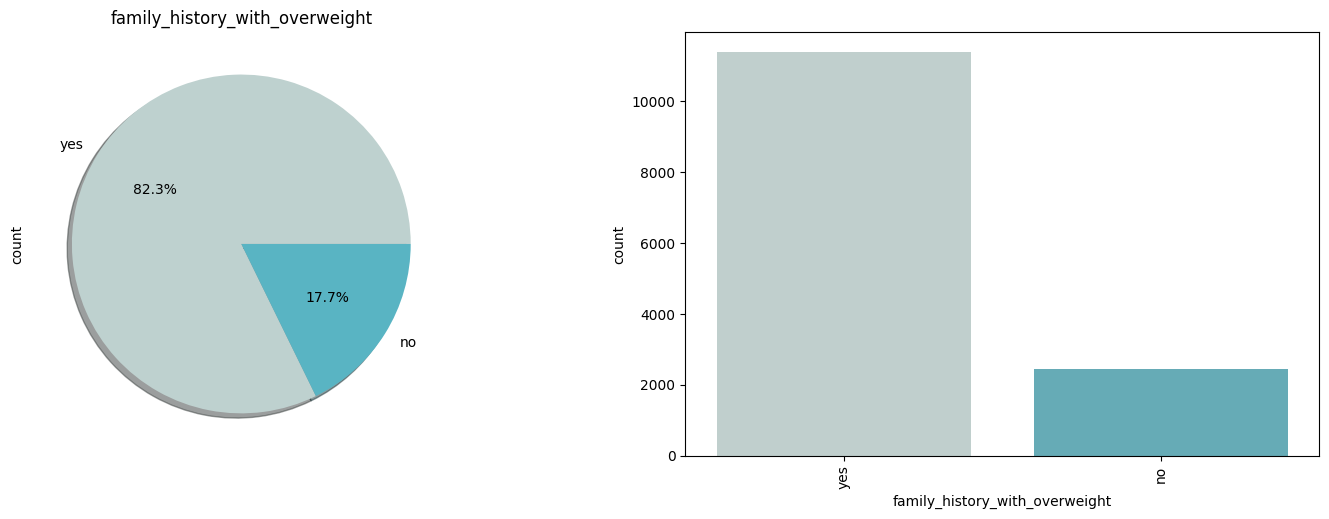

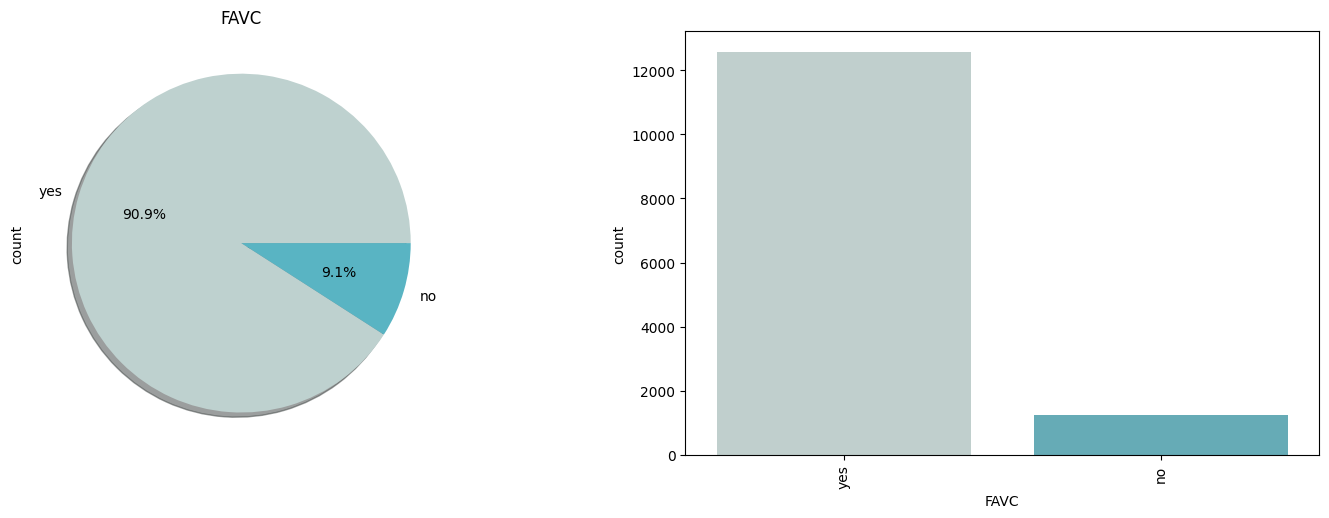

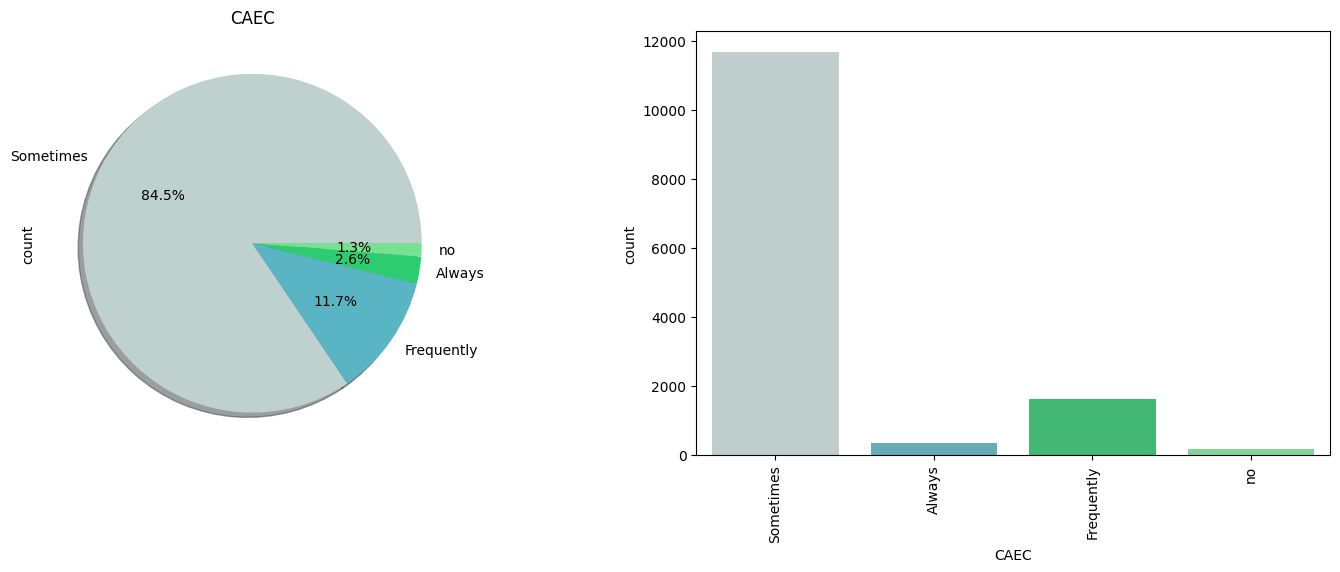

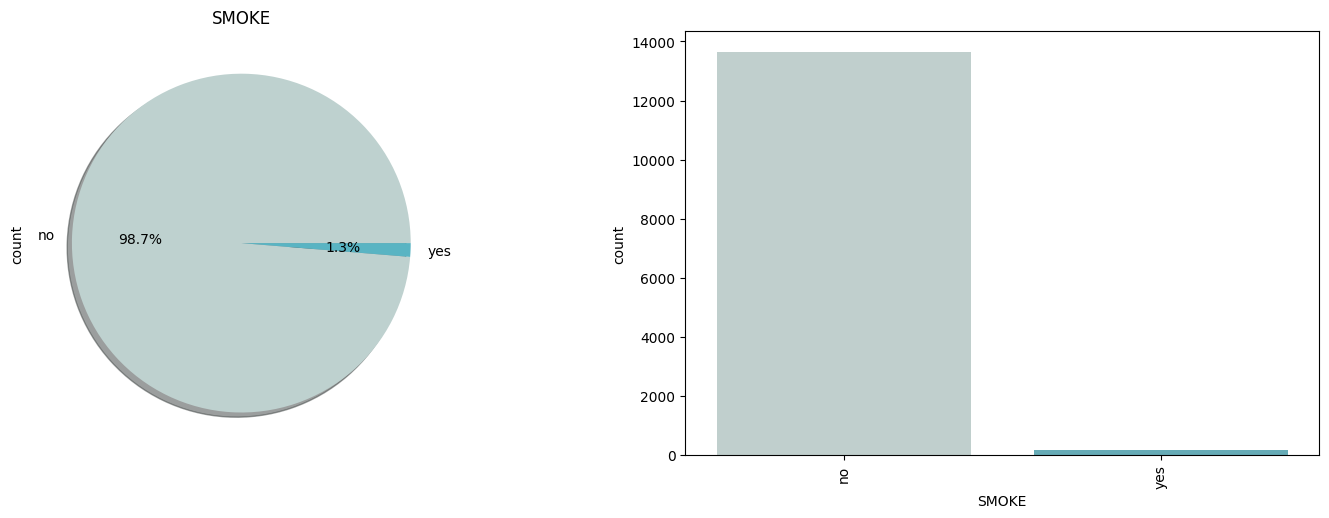

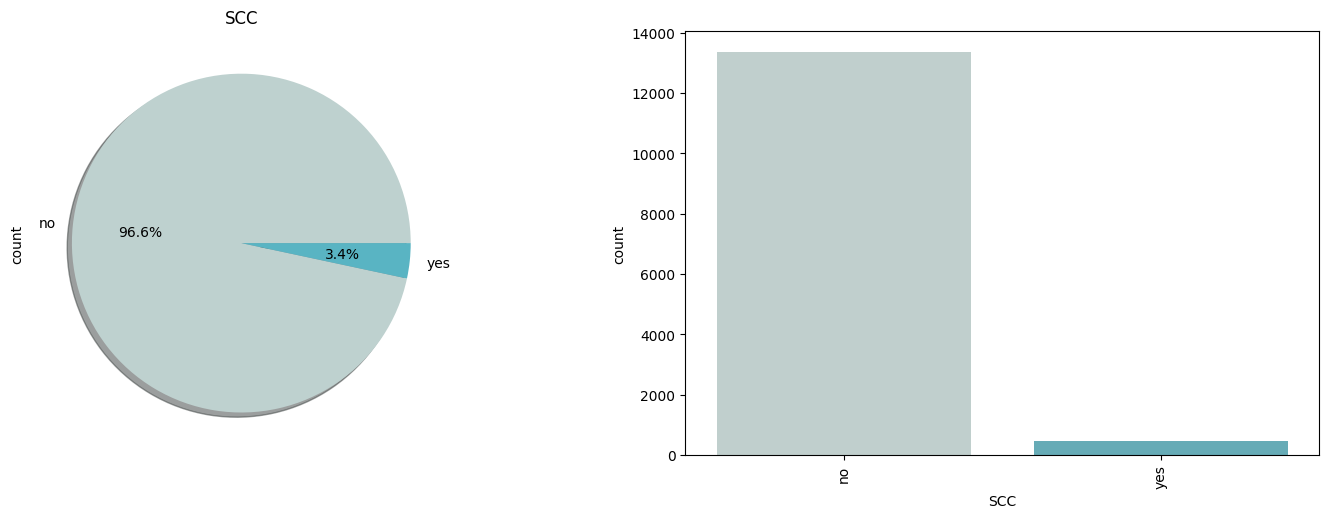

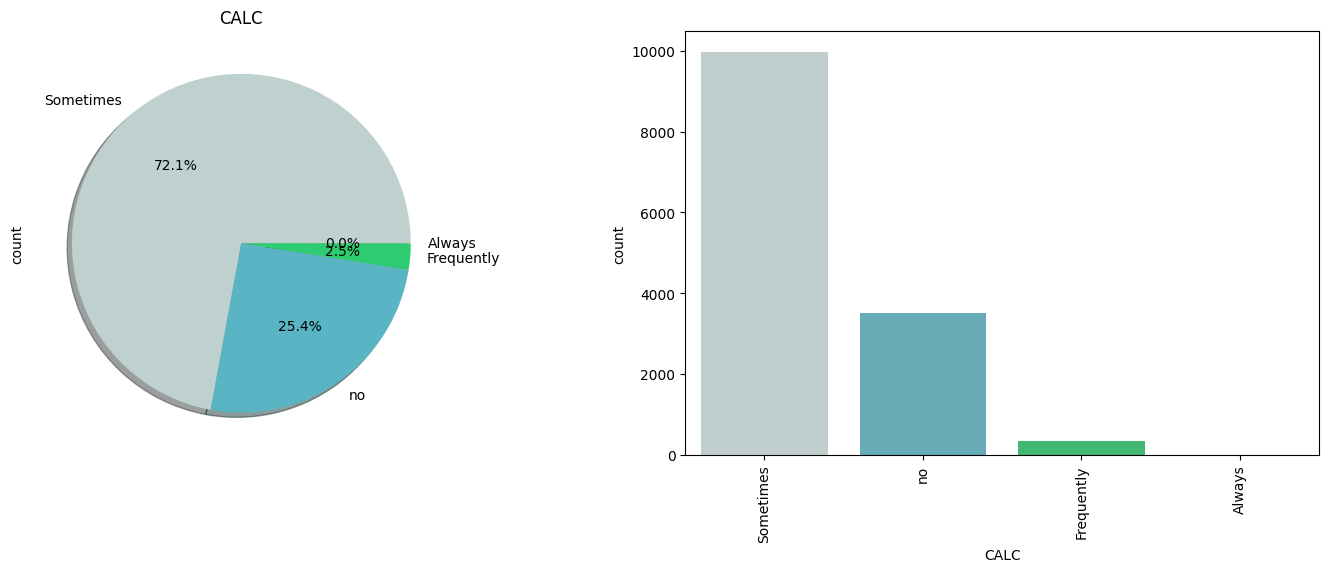

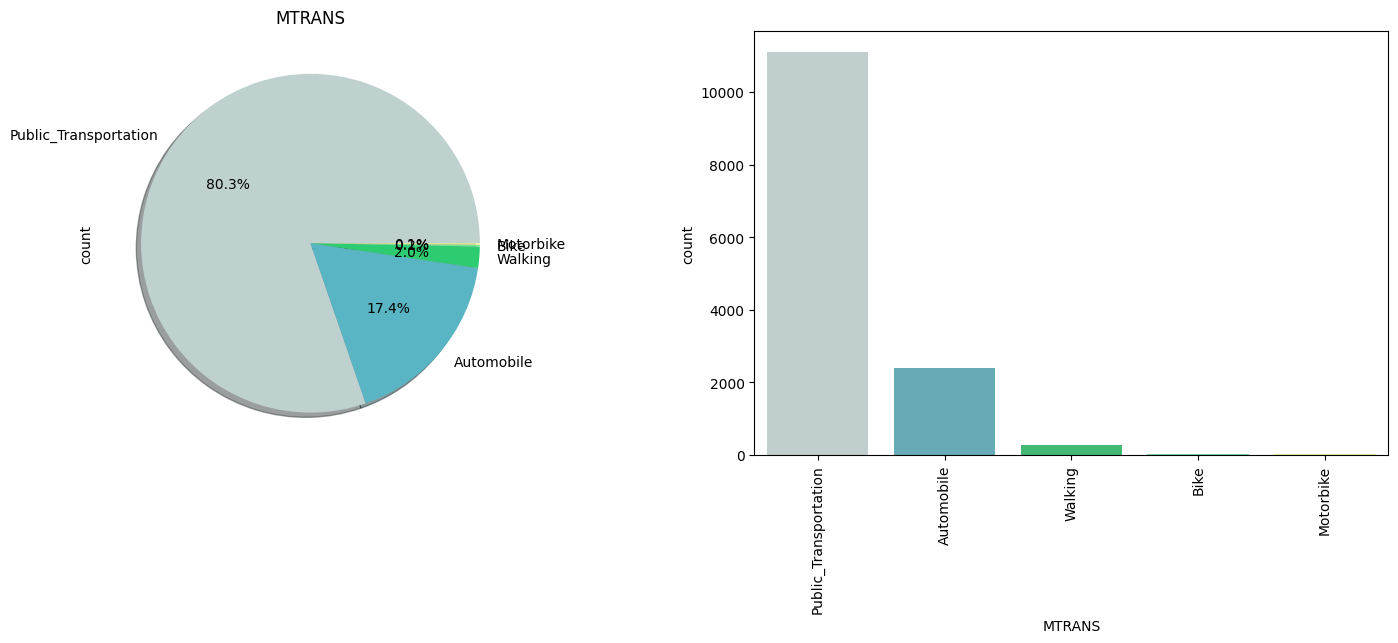

In [156]:
colors = ["#BED1CF", "#59B4C3", "#2ecc71", "#74E291", "#EFF396", "#34495e"]

for col in categorical_vars:
    # Pie chart
    f, ax = plt.subplots(1, 2, figsize=(18, 5.5))

    test_data[col].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[0], shadow=True, colors=colors)
    ax[0].set_title(f'{col}')

    # Count plot
    sn.countplot(x=col, data=test_data, ax=ax[1], palette=colors)
    plt.xticks(rotation=90)

    plt.show()

## 2. Numerical columns

**Defining numerical columns**

In [157]:
numeric=train_data[['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']]

### Showing the distributions

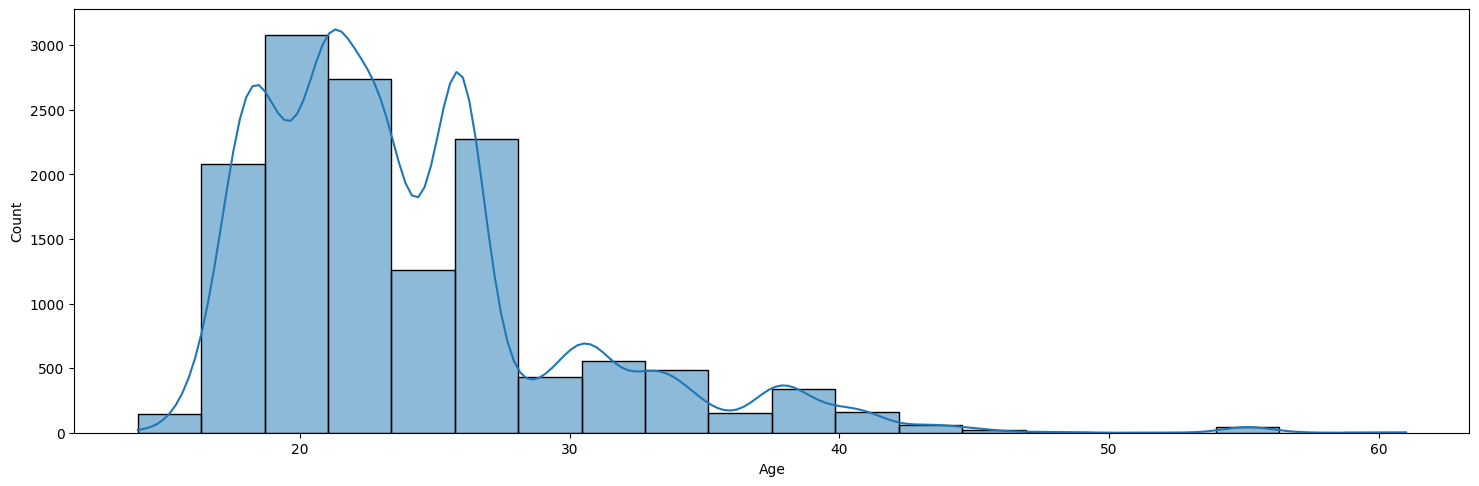

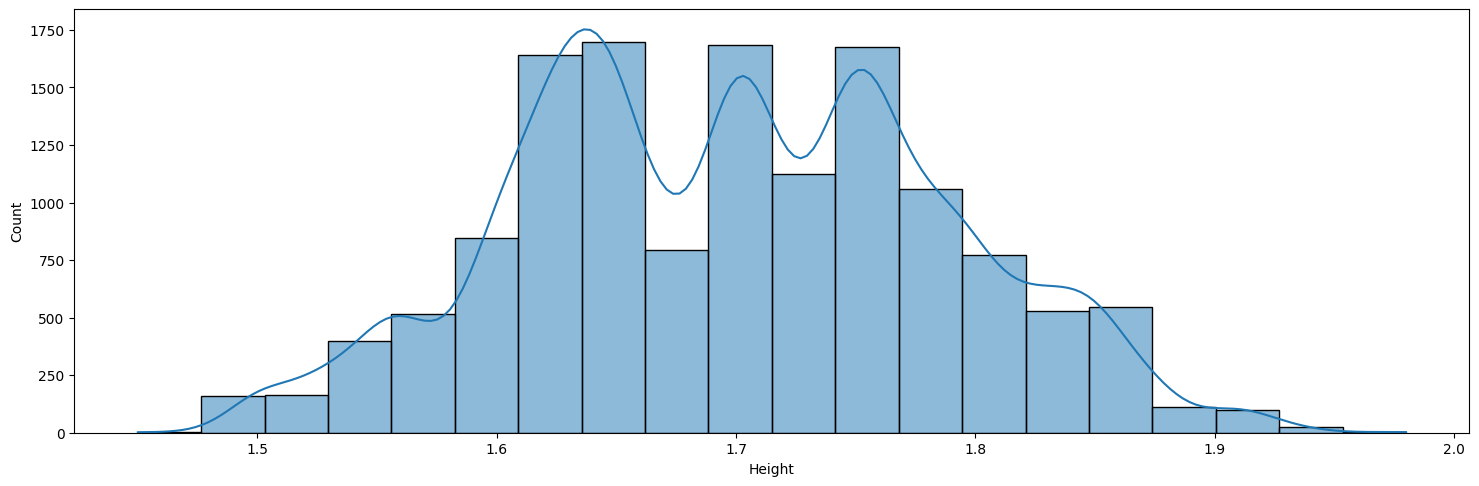

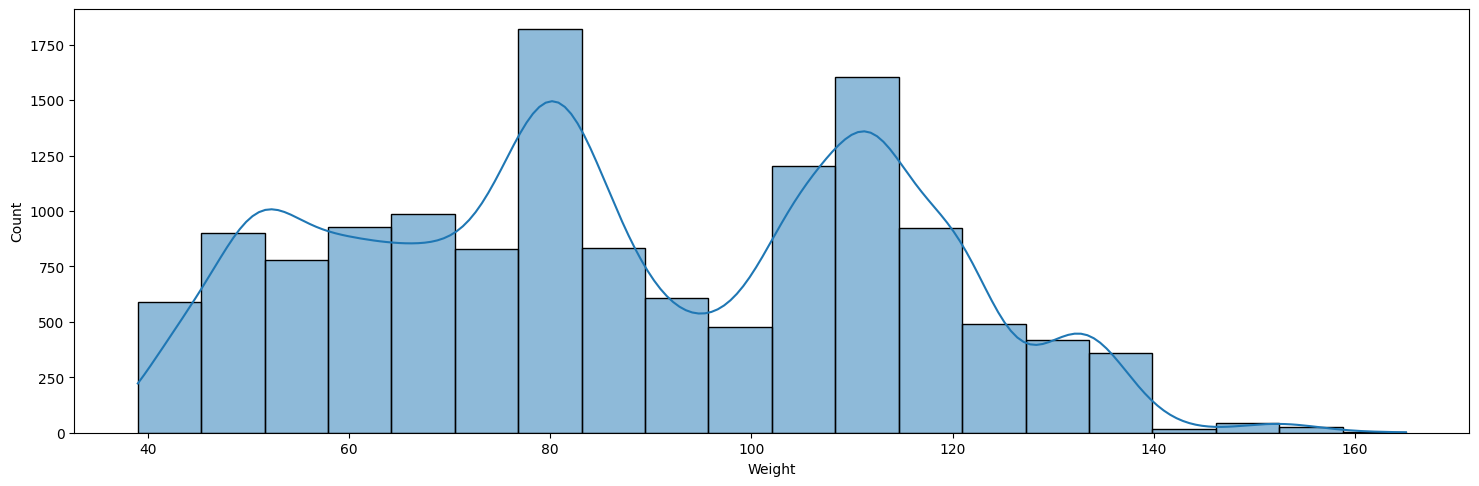

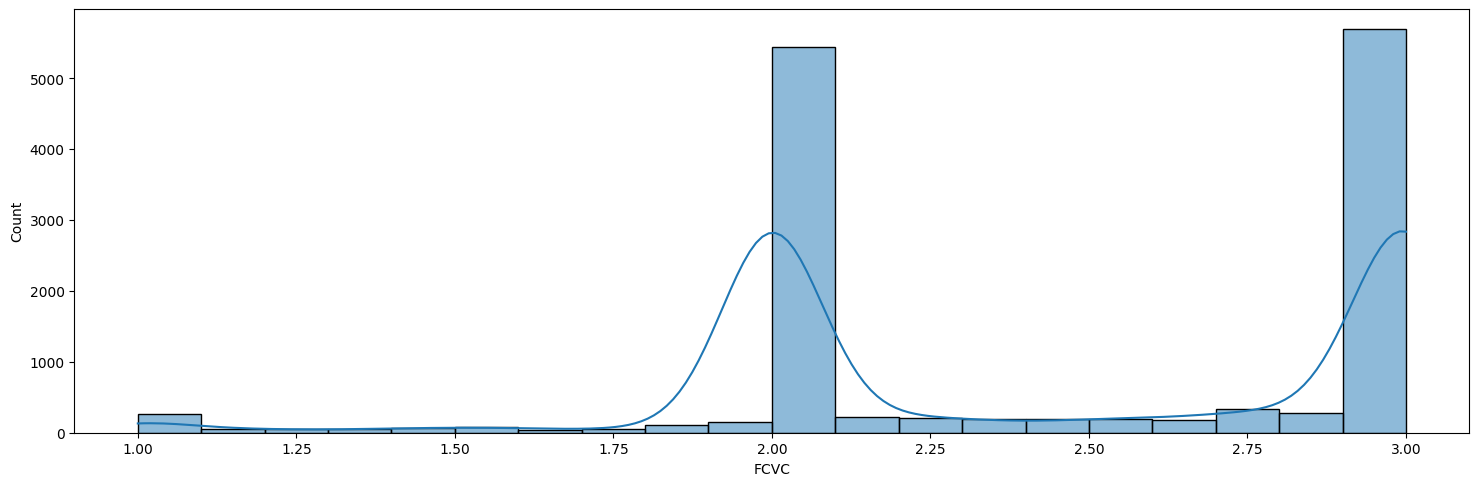

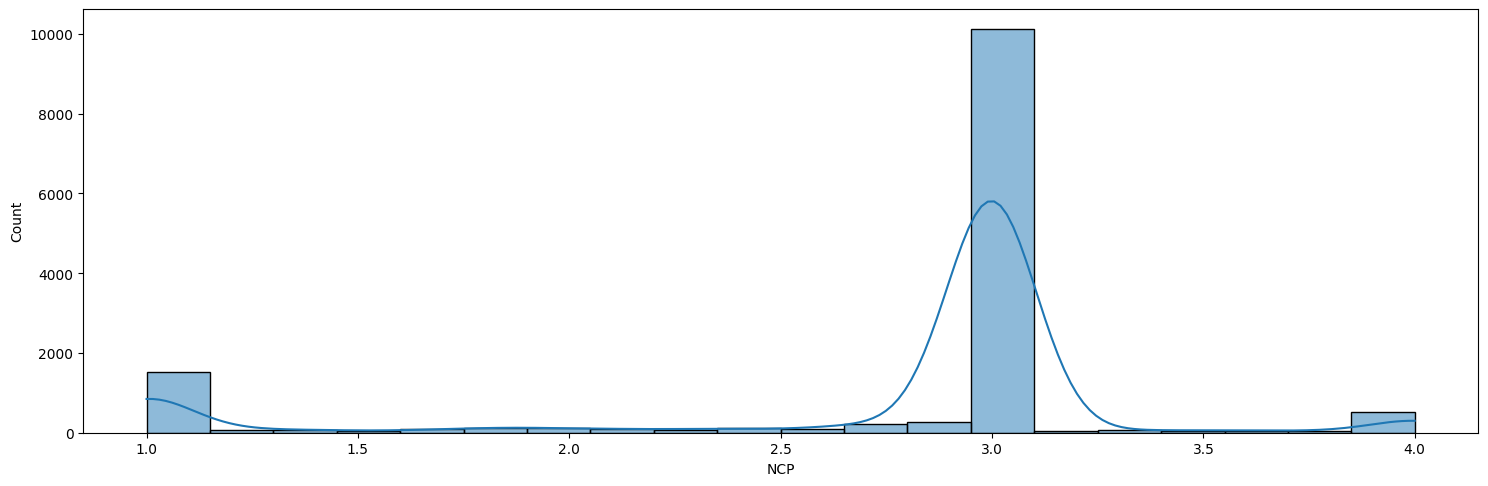

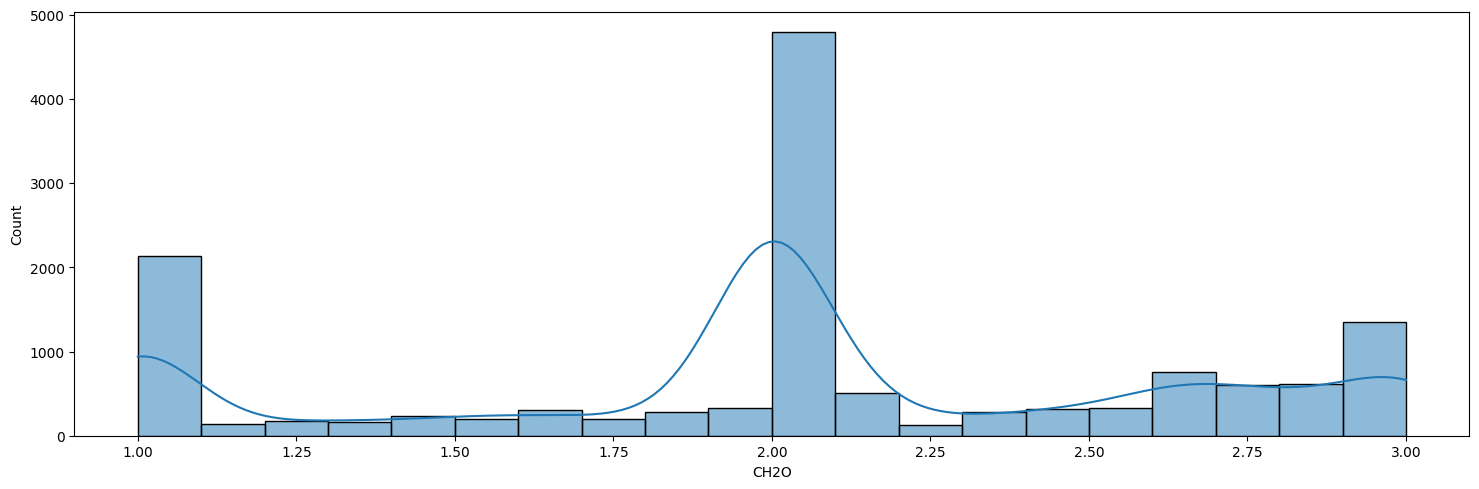

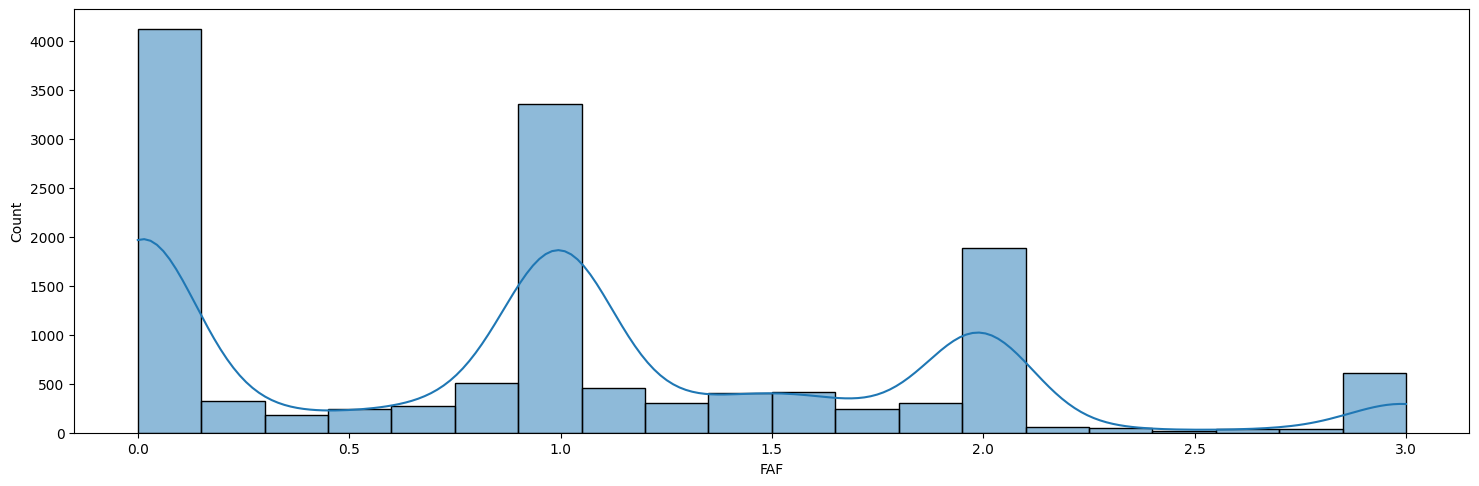

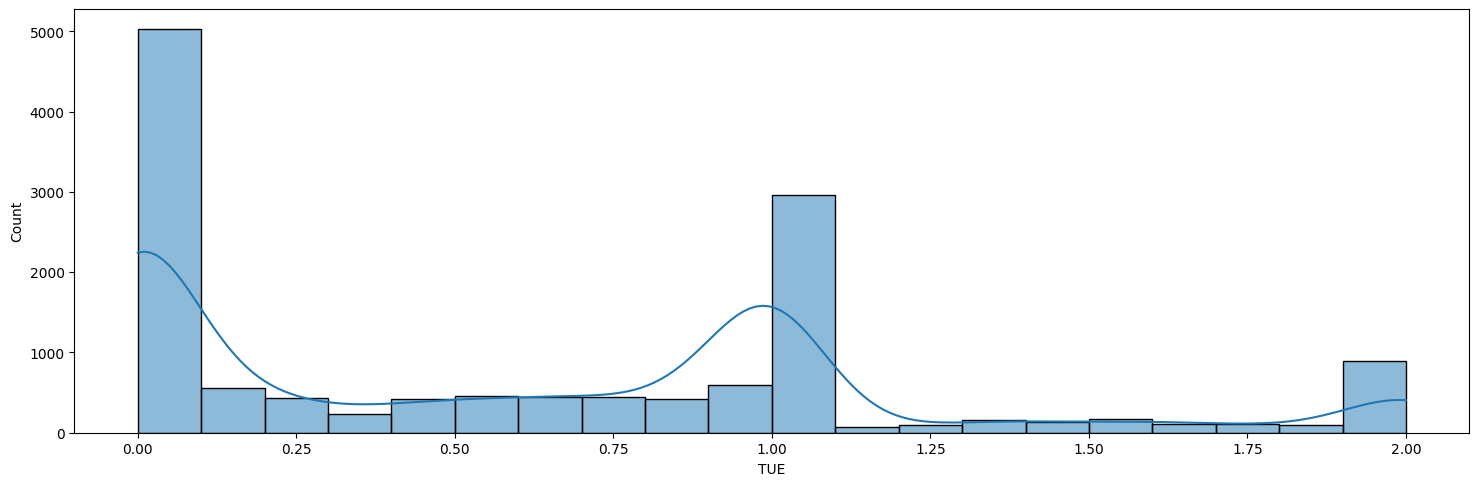

In [158]:
for num in numeric:
    f,ax=plt.subplots(figsize=(18,5.5))
    sn.histplot(data=test_data, x=num, bins=20, kde=True)

### Label Encoding

In [159]:
label=LabelEncoder()

for col in categorical_vars:
    test_data[col]=label.fit_transform(test_data[col])

In [160]:
test_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,2,0,2.825629,0,0.855400,0.000000,2,3
1,20759,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,2,0,3.000000,0,1.000000,0.000000,2,3
2,20760,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,2,0,2.621877,0,0.000000,0.250502,2,3
3,20761,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,2,0,2.786417,0,0.094851,0.000000,2,3
4,20762,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,2,0,2.653531,0,0.000000,0.741069,2,3


### Visualizing the outliers

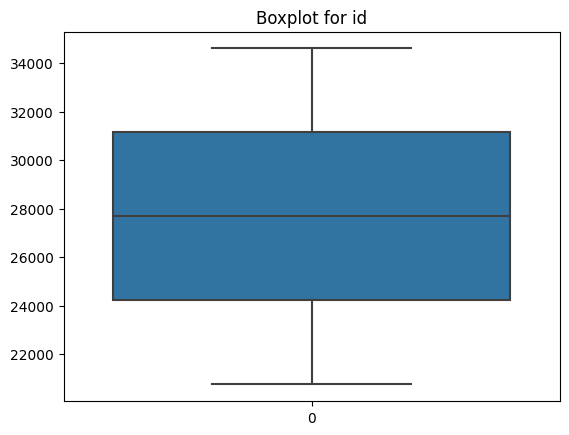

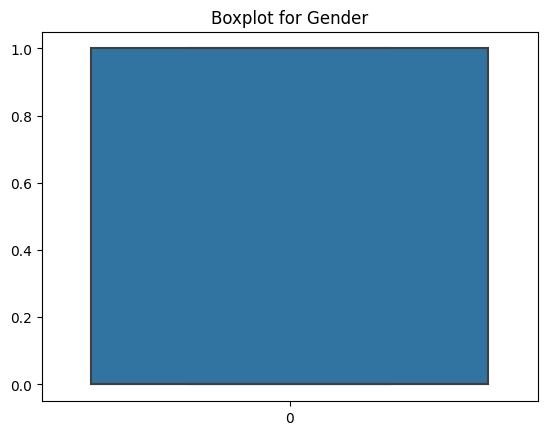

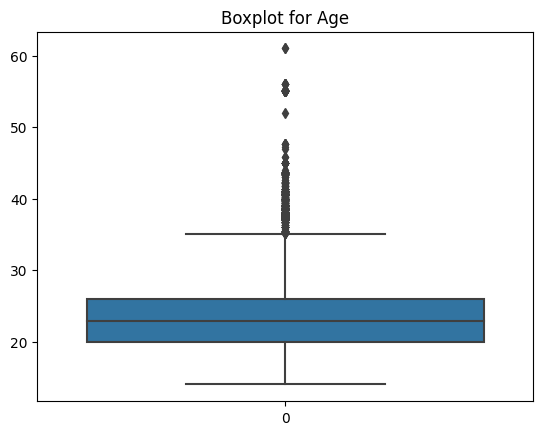

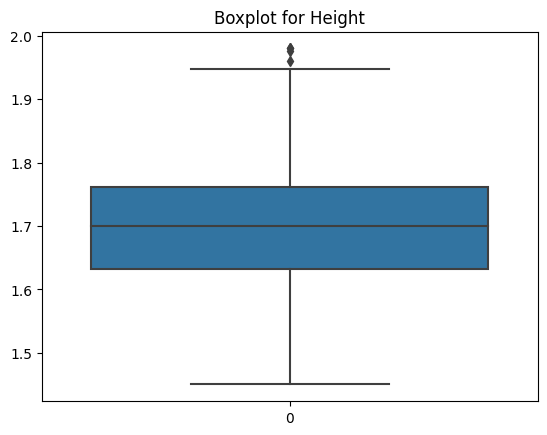

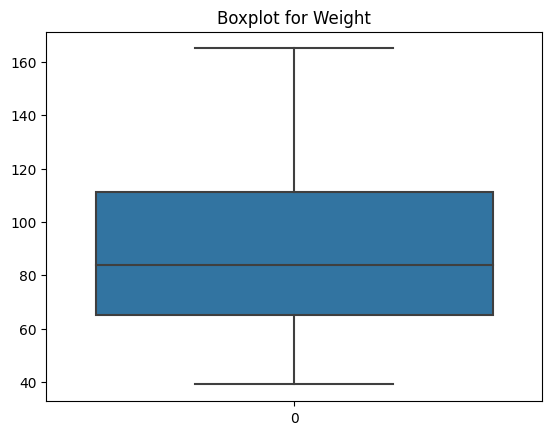

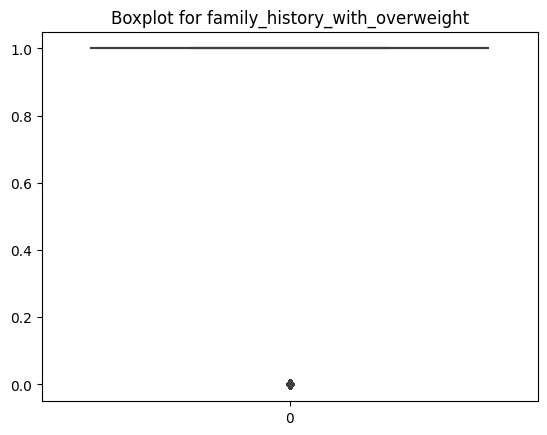

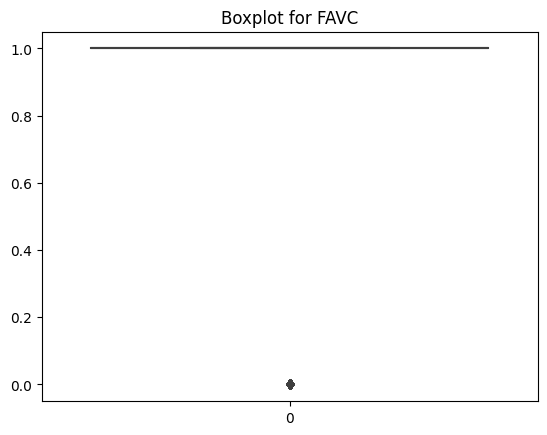

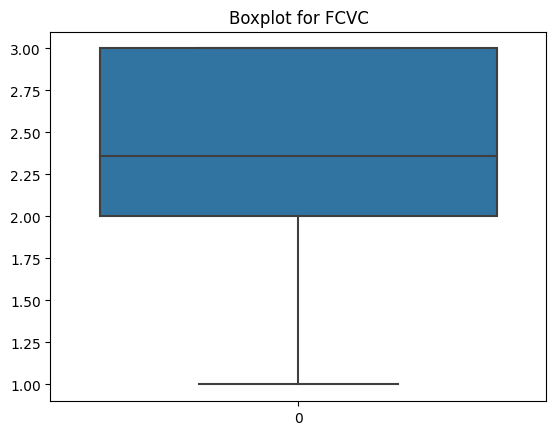

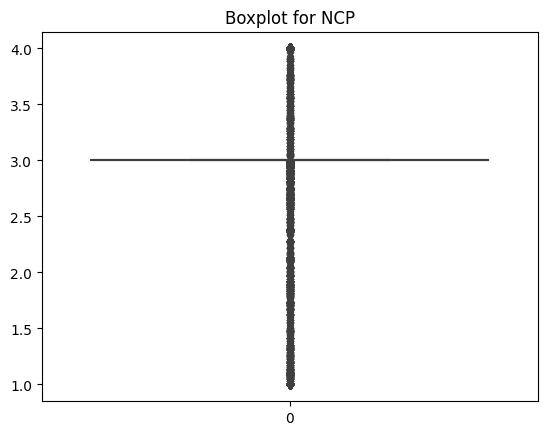

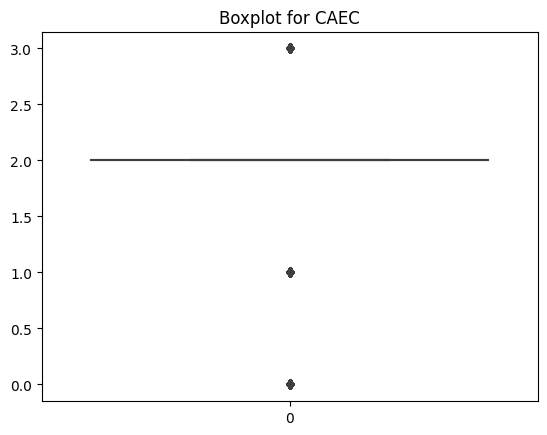

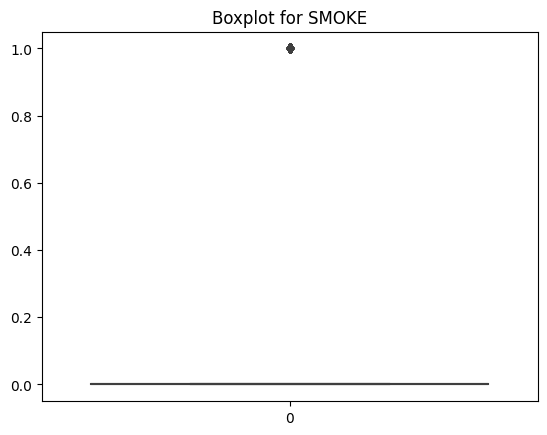

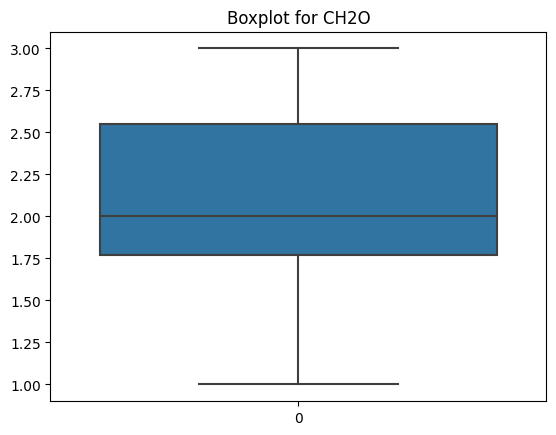

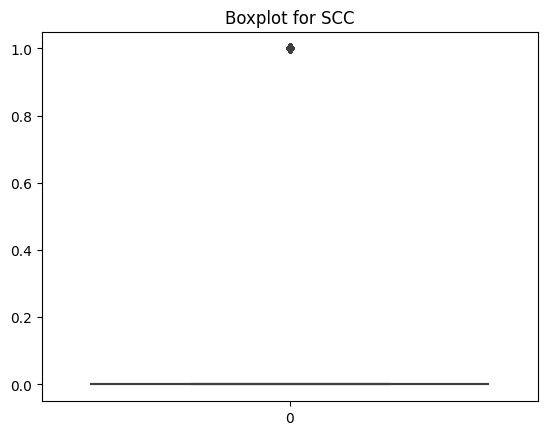

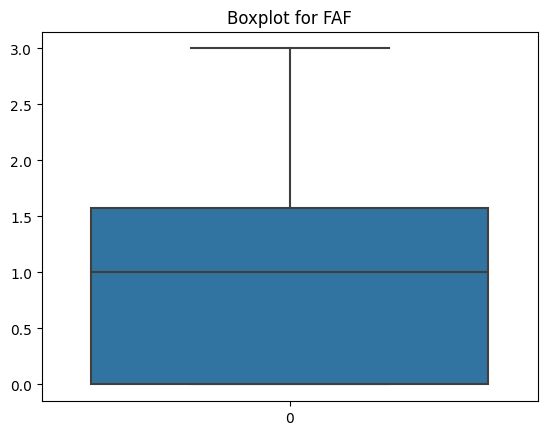

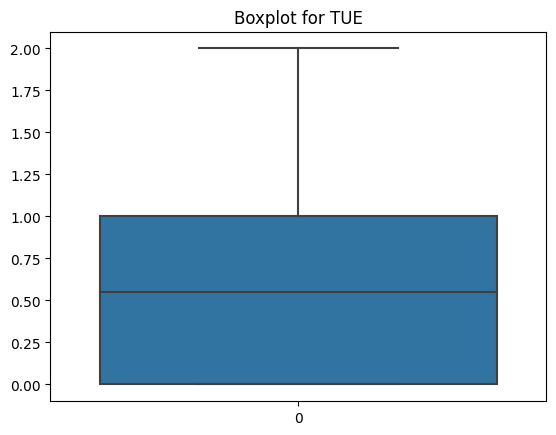

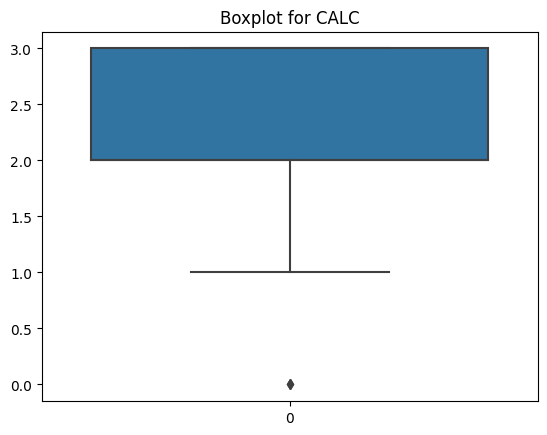

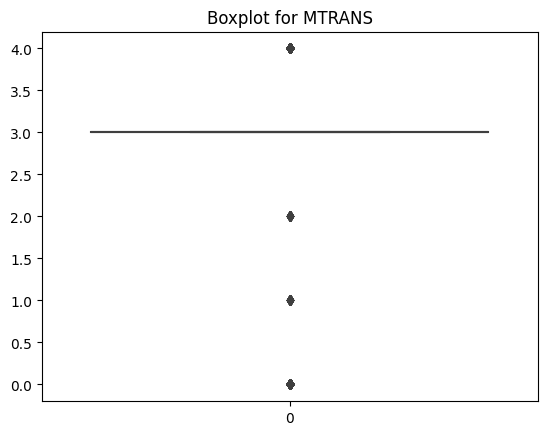

In [161]:
for col in test_data.columns:
    sn.boxplot(test_data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

------------------------------------------------------------------------------------------------------

# For Kaggle Submission

In [162]:
X=test_data.drop('id', axis=1)

In [163]:
print(X)

       Gender        Age    Height      Weight  \
0           1  26.899886  1.848294  120.644178   
1           0  21.000000  1.600000   66.000000   
2           0  26.000000  1.643355  111.600553   
3           1  20.979254  1.553127  103.669116   
4           0  26.000000  1.627396  104.835346   
...       ...        ...       ...         ...   
13835       1  23.327836  1.721384   78.030383   
13836       0  29.000000  1.590000   62.000000   
13837       0  22.935612  1.585547   44.376637   
13838       1  21.000000  1.620000   53.000000   
13839       1  26.490926  1.812259  120.980508   

       family_history_with_overweight  FAVC      FCVC       NCP  CAEC  SMOKE  \
0                                   1     1  2.938616  3.000000     2      0   
1                                   1     1  2.000000  1.000000     2      0   
2                                   1     1  3.000000  3.000000     2      0   
3                                   1     1  2.000000  2.977909     2      0   

### Predict using LGBM model

In [164]:
model=lgm.predict(X)

In [165]:
r=lb.inverse_transform(model)
r

array(['Obesity_Type_II', 'Obesity_Type_II', 'Obesity_Type_II', ...,
       'Obesity_Type_I', 'Obesity_Type_I', 'Obesity_Type_II'],
      dtype=object)